# Trending Topics Event Study
- How much does going trending increase engagement?

In [14]:
import preprocessing
from config import TRENDS_DIR
%load_ext autoreload
%autoreload 2
import pandas as pd
import tqdm
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, date, timedelta
from config import TWITTER_DATA_DIR
import pickle
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def get_trend_behavior(ht):
    '''Takes a hashtag and compiles all trend date about it
    Currently just returns the beginning and end of the trending status, but can do more potentially
    '''
    res = [] 
    for entry in os.scandir(TRENDS_DIR):
        # crude filtering for date csv names 
        if entry.path[-7] == '-':
            df = pd.read_csv(entry, header=None,
                            names=['hashtag', 'place', 
                                   'level', 'day', 
                                   'time', 'volume', 'nan'])
            df['hashtag'] = df.hashtag.apply(lambda x: x.replace('#','').lower())
            try:
                df['datetime'] = pd.to_datetime(df.day + df.time, format='%Y-%m-%d%H:%M')
            except:
                print('error with hashtag', ht)
                return df
            temp = df.query(f'hashtag == "{ht}"')
            if len(temp) > 0:
                res.append(temp)
    if len(res) > 0:
        return pd.concat(res)
    else:
        print(ht, 'did not appear to trend')
        return pd.DataFrame()

In [3]:
campaigns = preprocessing.load_campaign()

In [5]:
hashtag = 'jharkhandwithmodi'
tweets = campaigns[hashtag]

In [16]:
with open(os.path.join(TWITTER_DATA_DIR, 'exposure_results.pkl'), 'rb') as f:
    exposures = pickle.load(f)

In [22]:
[k for k,v in exposures[hashtag].items() if v[0] + v[1] == 0]

['style_icon133',
 'rajaguru1234',
 'vikash5973',
 'missing840918228',
 'trueself1950',
 'army__bratt',
 'nikhilpec',
 'guptasubham_',
 'imsjaiszz',
 'kajalnishad13',
 'bjp4chatra',
 'sarkar_nidhir',
 'arvindshrimal15',
 'abhishekbjpknj',
 'modisarkar2023',
 'jyotiresversays',
 'missing1036957413599920128',
 'missing1129705018246873088',
 'missing1073918577311330304',
 'missing1112955549358809090',
 'missing2685604826',
 'missing1076004592243142656',
 'missing1026656311163985920',
 'missing1047451135643017216',
 'ml_sen',
 'missing112393543',
 'newsranchilocal',
 'missing2375083530',
 'wearejharkhand',
 'rakesh_bjp_jsr',
 'bjymvyas',
 'kishanlalgupt13',
 'missing1138280497048506368',
 'imsushant16',
 'savitasingh36',
 'rakitweets',
 'rajleaks',
 'kushawah143',
 'missing1161238247655108609',
 'missing916984826724474880',
 'ivishalpatelbjp',
 '9ov81ue4je6nnfo',
 'satkumarsharma',
 'missing941212824344207360',
 'mejayvardhan',
 'modifiedbjp',
 'bhanu77712728',
 'missing1144208514287489024

In [37]:
exposures.keys()

dict_keys(['jharkhandwithmodi', 'surgingsilk', 'merapmmeraabhimaan', 'kiamadeinap', 'dousupportnaxals', 'mizoramwithmodi', 'timesofrahul', 'threadsofexcellence', 'msmetextilesconclave', 'bjp4jind', 'म्हारा_वोट_भाजपा_को', 'parakramparv', 'technicaltextiles', 'himachalkacu', 'congaapbhaibhai', 'sizeindia', 'savekeralafromcommunists', 'copypastencp', 'bjp4betterandhra', 'jaihindkisena', 'congressinsultsairforce', 'armedforcesweek2018', 'newindia4narishakti', 'congressdefencescams', 'hooghly_chalo', 'pminprayagraj', 'amethikididismritiirani', 'namowithtraders', 'corruptcongressfearsdemo', 'artisanspeak', 'indiabolemodidobara', 'urban_नक्सली_केजरीवाल', 'zamanatke1000din', 'yuvakemannkibaat', 'congressframedamitshah', 'iafbacksrafale', 'भारत_माता_की_जय', 'namothon', 'लक्ष्य_हमारा_मोदी_दोबारा', 'congressagainstnationalsecurity', 'आदर्शघोटाला_संघर्ष_यात्रा', 'pminraebareli', 'bjpforsamridhkisan', 'facebookboomed', 'badalrahihaikashi', 'lawlessodisha', 'rafailgandhi', 'rahulkidefencedeals', 'ra

In [42]:
pd.read_csv(os.path.join(TRENDS_DIR, hashtag+'.csv'), parse_dates=['datetime'])

,Unnamed: 0,hashtag,place,level,day,time,volume,nan,datetime
0,11032,jharkhandwithmodi,Nagpur,Town,2019-02-17,10:00,NaN,NaN,2019-02-17 10:00:00
1,11082,jharkhandwithmodi,Lucknow,Town,2019-02-17,10:00,NaN,NaN,2019-02-17 10:00:00
2,11134,jharkhandwithmodi,Kanpur,Town,2019-02-17,10:00,NaN,NaN,2019-02-17 10:00:00
3,11186,jharkhandwithmodi,Patna,Town,2019-02-17,10:00,NaN,NaN,2019-02-17 10:00:00
4,11232,jharkhandwithmodi,Ranchi,Town,2019-02-17,10:00,NaN,NaN,2019-02-17 10:00:00
...,...,...,...,...,...,...,...,...,...
303,44948,jharkhandwithmodi,Bangalore,Town,2019-02-17,16:00,11804.0,NaN,2019-02-17 16:00:00
304,44997,jharkhandwithmodi,Chennai,Town,2019-02-17,16:00,11804.0,NaN,2019-02-17 16:00:00
305,45048,jharkhandwithmodi,Delhi,Town,2019-02-17,16:00,11829.0,NaN,2019-02-17 16:00:00
306,45097,jharkhandwithmodi,India,Country,2019-02-17,16:00,11804.0,NaN,2019-02-17 16:00:00


In [43]:
pd.read_csv(os.path.join(TRENDS_DIR, hashtag+'.csv'), parse_dates=['datetime']).datetime.max()

Timestamp('2019-02-17 17:00:00')

In [23]:
def plot_campaign_activity(hashtag, tweet_dict, quantiles=(.1,.99), include_trend=True):
    # plot tweets by type as a histogram
    # shows trending period, and a little bit before and after,
    for t_id, tweet in tweet_dict.items():
        tweet['adj_date'] = tweet['date'] + timedelta(hours=5, minutes=30)
        if tweet['retweet_from'] == '':
            if tweet['template'] != '':
                tweet['type'] = 'template'
            else:
                tweet['type'] = 'regular'
        else:
            if tweet['template'] != '':
                tweet['type'] = 'template-retweet'
            else:
                tweet['type'] = 'regular-retweet'
        t_exp, n_exp, _ = exposures[hashtag][tweet['username']]
        tweet['template_exposure'] = t_exp
        tweet['normal_exposure'] = n_exp
        tweet['total_exposure'] = t_exp + n_exp
                
    df = pd.DataFrame.from_dict(tweet_dict).transpose()
    

    fig, ax = plt.subplots(1, 1, figsize=(14,4.5))
    
    trending_data = pd.read_csv(os.path.join(TRENDS_DIR, hashtag+'.csv'), parse_dates=['datetime'])
  
    start = trending_data.datetime.min() + timedelta(hours=5, minutes=30)
    end = trending_data.datetime.max() + timedelta(hours=5, minutes=30)

    min_date = start - timedelta(hours=3)
    max_date = end + timedelta(hours=3)

    (n, bins, patches) = ax.hist([df[df.type=='template'].adj_date, 
              df[df.type=='template-retweet'].adj_date,
              df[df.type=='regular'].adj_date,
              df[df.type=='regular-retweet'].adj_date,
             ],
            label=["Template tweets", "Template retweets", 
                    "Non-Template tweets", "Non-Template retweets",
                  ],
             color=["red","orange",'black','grey'], 
             stacked=True, alpha=0.6, bins=100, range=(min_date,max_date), cumulative=False, rwidth=0.9)
    
    _, max_hist_level = ax.get_ylim()
    plt.plot([start, end], [max_hist_level]*2, '-', color='black', alpha=1) 
    plt.plot([start, end], [max_hist_level]*2, '|', color='black') 
    plt.text(start + (end-start)/2, max_hist_level/1.1, f'#{hashtag} trending', fontsize=12, horizontalalignment='center')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.legend()
    plt.xlabel('Time', fontsize=18)
    plt.ylabel('Tweet volume', fontsize=16)
    plt.title(f'#{hashtag} Tweets Over Time')
    plt.tight_layout()
    plt.show()
    return df 

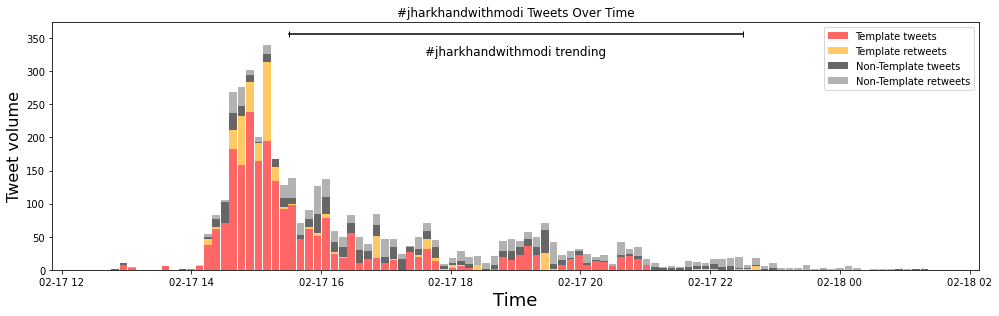

In [24]:
temp_df = plot_campaign_activity(hashtag, tweets)

In [25]:
temp_df

,username,id,retweet_from,template,retweet_id,text,date,retweets,favorites,adj_date,type,template_exposure,normal_exposure,total_exposure
1172033856607682560,bjp4latehar,1172033856607682560,,,,आधारभूत संरचना हो या शिक्षा या फिर स्वच्छता या...,2019-09-12 06:27:01,0,0,2019-09-12 11:57:01,regular,151,64,215
1172108207499558912,vjay21788,1172108207499558912,ommathur_bjp,,1172063209785741312,rt @ommathur_bjp: #bharatmatakijai भारत माता क...,2019-09-12 11:22:28,140,0,2019-09-12 16:52:28,regular-retweet,146,271,417
1097069751128358914,vagrawa3,1097069751128358914,,प्रधानमंत्री @narendramodi ने स्वच्छ भारत के ...,,प्रधानमंत्री @narendramodi ने स्वच्छ भारत के ...,2019-02-17 09:46:25,0,0,2019-02-17 15:16:25,template,5,10,15
1172084320225263619,ashishmerkhed,1172084320225263619,bjp4india,,1172082904316334080,rt @bjp4india: चुनाव के समय मैंने आपसे कामदार ...,2019-09-12 09:47:32,456,0,2019-09-12 15:17:32,regular-retweet,59,60,119
1097111295562678276,manishkbjp,1097111295562678276,bjp4jharkhand,2014 तक हायर सेकेंडरी स्कूलों की संख्या 653 थी...,1097067864467550208,rt @bjp4jharkhand: 2014 तक हायर सेकेंडरी स्कूल...,2019-02-17 12:31:30,6,14,2019-02-17 18:01:30,template-retweet,218,53,271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172042088378011648,bjym4dhanbad,1172042088378011648,isurajsinghbjym,,1172030378510405634,rt @isurajsinghbjym: रखण्ड में महिलाओं के लिए ...,2019-09-12 06:59:44,2,0,2019-09-12 12:29:44,regular-retweet,0,9,9
1097077746495299586,ipravinsegaliya,1097077746495299586,,,,pm shri @narendramodi ji lays foundation stone...,2019-02-17 10:18:12,0,0,2019-02-17 15:48:12,regular,0,3,3
1172060945721352192,lakshya2019,1172060945721352192,,,,झारखण्ड के 90 से ज्यादा किसान इजरायल से कृषि क...,2019-09-12 08:14:39,0,0,2019-09-12 13:44:39,regular,5,55,60
1097075321549971456,bjp4saraikela1,1097075321549971456,,"झारखण्ड को प्रधानमंत्री जी की एक और सौगात, आजा...",,"झारखण्ड को प्रधानमंत्री जी की एक और सौगात, आजा...",2019-02-17 10:08:33,0,0,2019-02-17 15:38:33,template,402,11,413


In [225]:
def plot_trending_ts(hashtag, tweet_dict, quantiles=(.1,.99), time_bin='5Min', zero_out=False):
    # plot tweets by type as a histogram
    # shows trending period, and a little bit before and after,
    for t_id, tweet in tweet_dict.items():
        tweet['adj_date'] = tweet['date'] + timedelta(hours=5, minutes=30)
        if tweet['retweet_from'] == '':
            if tweet['template'] != '':
                tweet['type'] = 'template'
            else:
                tweet['type'] = 'regular'
        else:
            if tweet['template'] != '':
                tweet['type'] = 'template-retweet'
            else:
                tweet['type'] = 'regular-retweet'
    
        t_exp, n_exp, _ = exposures[hashtag][tweet['username']]
        tweet['template_exposure'] = t_exp
        tweet['normal_exposure'] = n_exp
        tweet['total_exposure'] = t_exp + n_exp
                
    df = pd.DataFrame.from_dict(tweet_dict).transpose()
    df.index = df['adj_date']

    fig, ax = plt.subplots(1, 1, figsize=(14,4.5))
        
    trending_data = pd.read_csv(os.path.join(TRENDS_DIR, hashtag+'.csv'), parse_dates=['datetime'])
  
    start = trending_data.datetime.min() + timedelta(hours=5, minutes=30)
    end = trending_data.datetime.max() + timedelta(hours=5, minutes=30)

    min_date = start - timedelta(hours=6)
    max_date = end + timedelta(hours=6)

    colors = ["red","orange",'black','grey']
    types = ['template', 'template-retweet', 'regular', 'regular-retweet']
#     types = ['regular', 'regular-retweet']
#     for typ, c in zip(types, colors):
#         temp = df[df.type == typ].resample(time_bin).count().username.loc[min_date:max_date]

#         ax.scatter(temp.index, temp, label=typ, color=c)
    temp = df[df.type == 'regular'] # only use regular tweets
    temp = temp[temp.total_exposure == 0].resample(time_bin).count().username.loc[min_date:max_date]
    ax.scatter(temp.index, temp, label='Zero Exposure Tweets')
    
    _, max_hist_level = ax.get_ylim()
    plt.plot([start - timedelta(hours=1), start], [max_hist_level*1.1]*2, '|--', color='black', alpha=1, 
             label='Resolution Error') 
    plt.plot([start, end], [max_hist_level]*2, '-', color='black', alpha=1) 
    plt.plot([start, end], [max_hist_level]*2, '|', color='black') 
    plt.text(start + (end-start)/2, max_hist_level/1.1, f'#{hashtag} trending', fontsize=12, horizontalalignment='center')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.legend()
    plt.xlabel('Time', fontsize=18)
    plt.ylabel('Tweet volume', fontsize=16)
    plt.title(f'#{hashtag} Tweets Over Time')
    plt.tight_layout()

    import matplotlib.dates as mdates
    hours = mdates.HourLocator() 
    minutes  = mdates.MinuteLocator(byminute=range(0,61,15))
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_minor_locator(minutes)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    #ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
    ax.grid(True)
    ax.grid(True, 'minor')
    fig.autofmt_xdate()
    
    plt.show()
    
    return df 

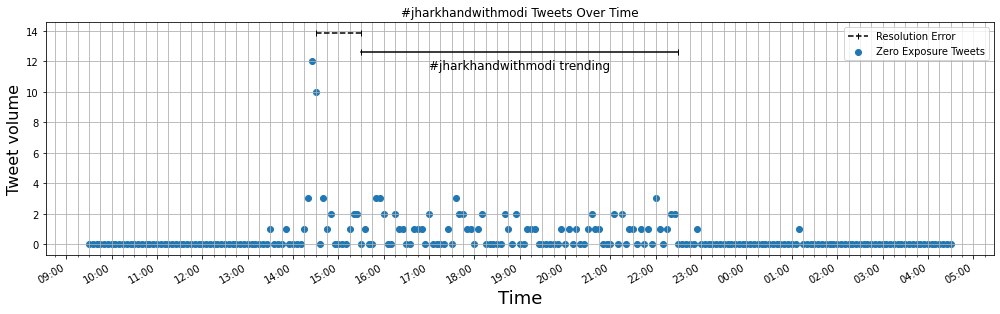

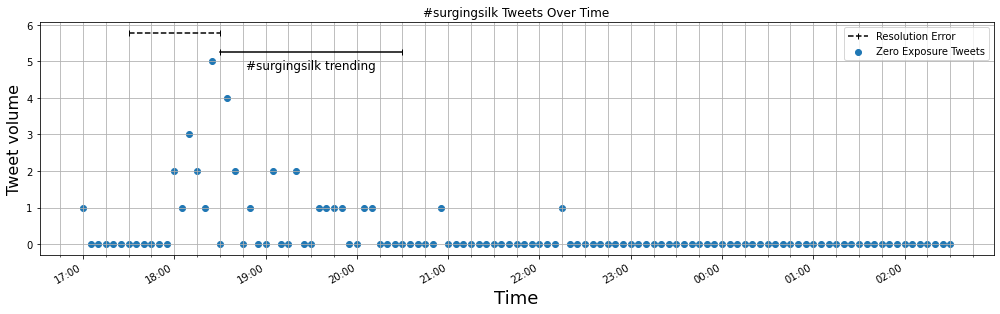

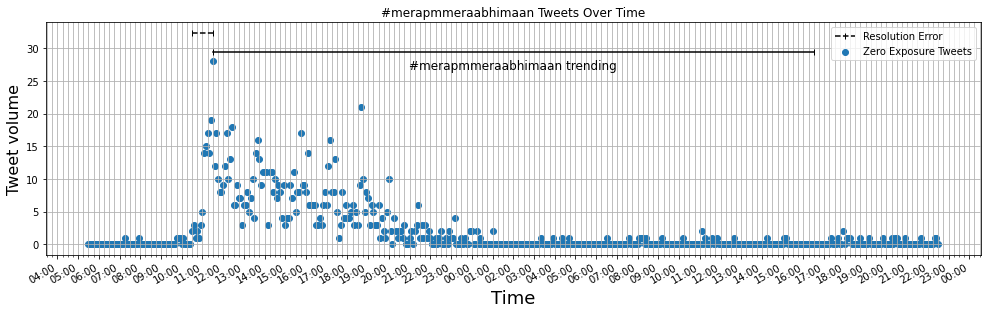

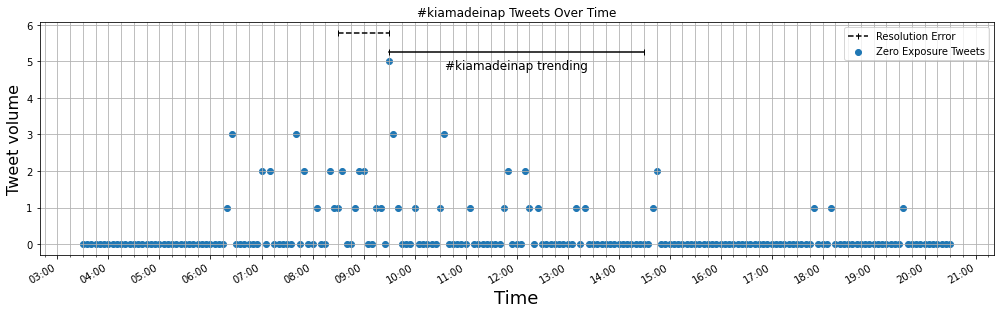

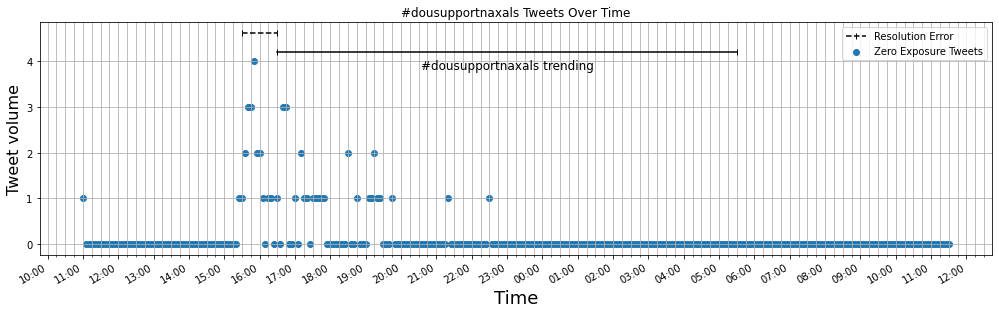

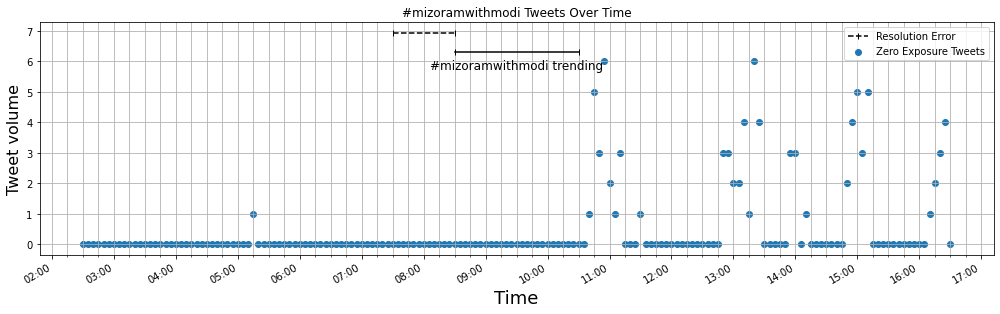

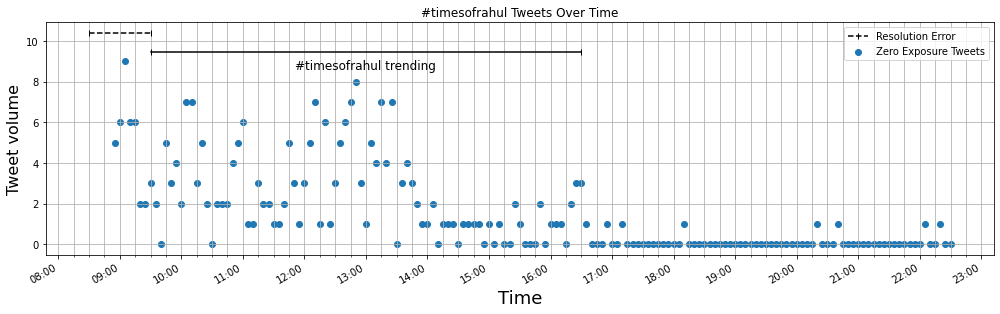

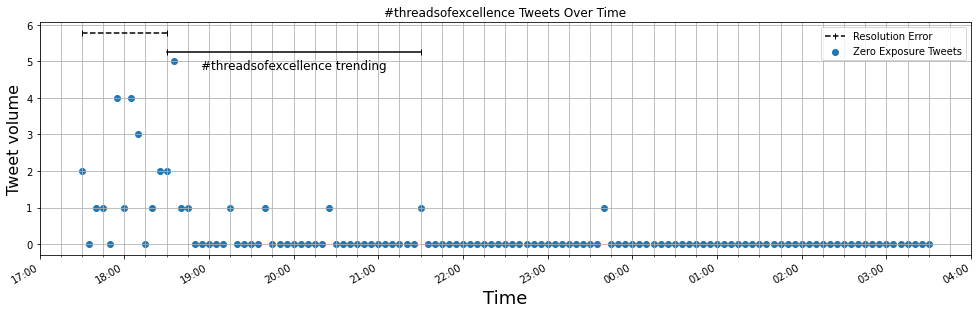

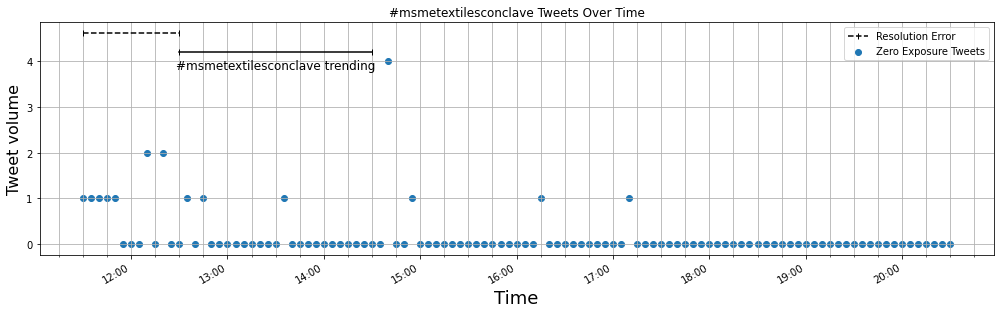

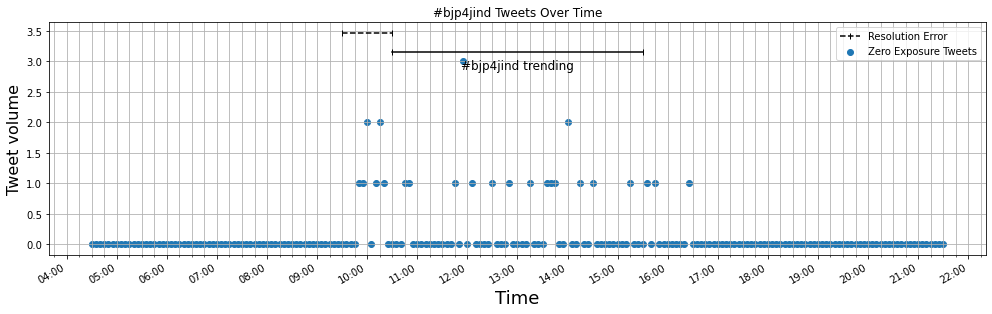

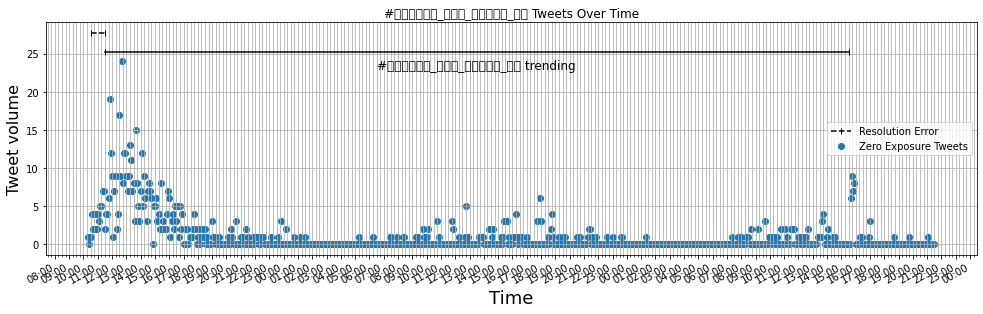

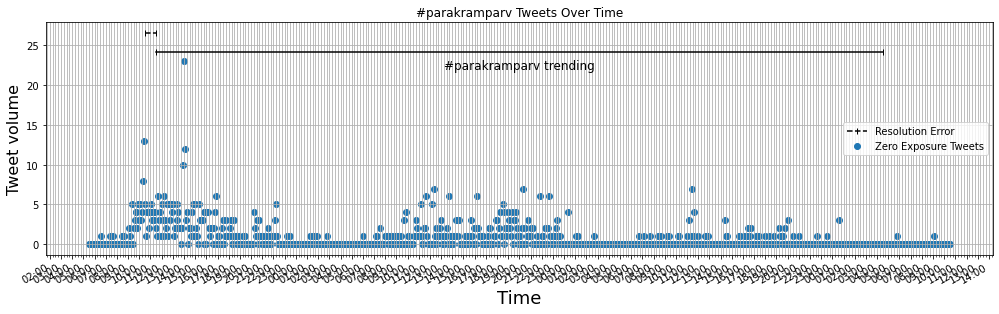

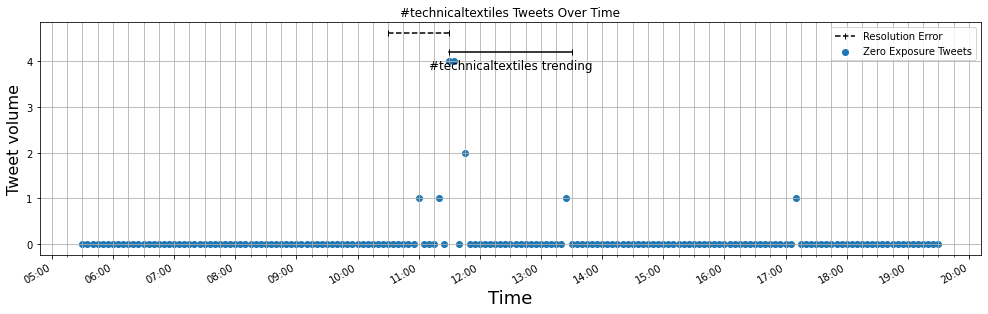

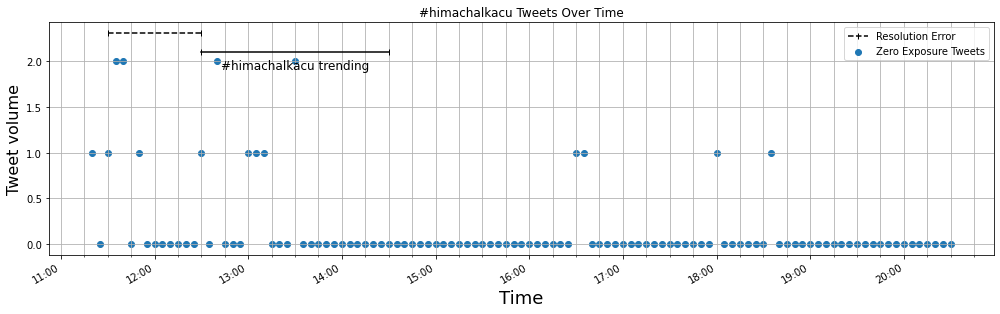

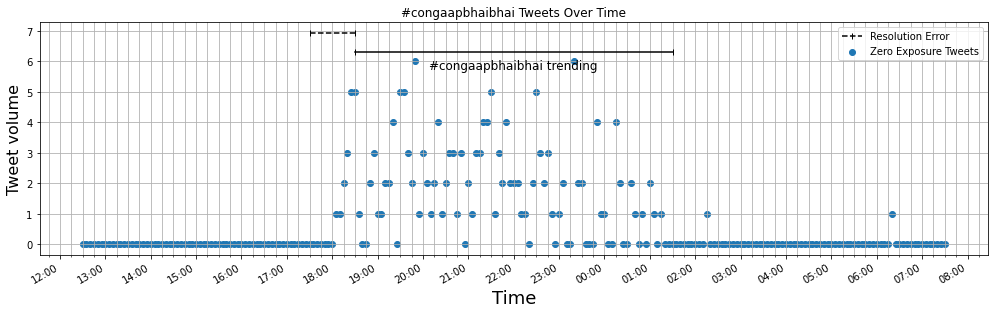

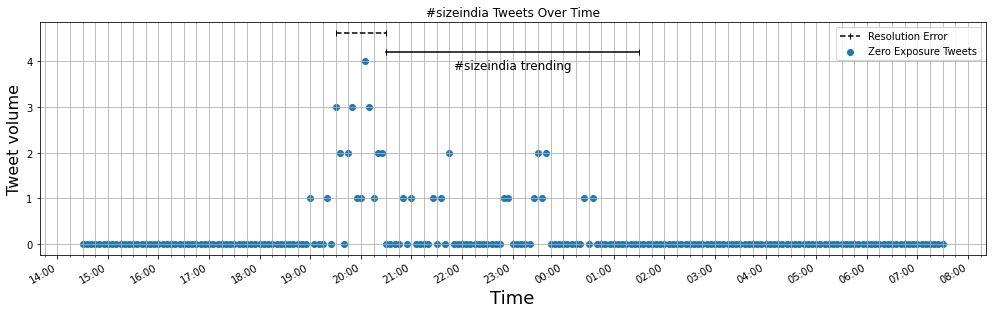

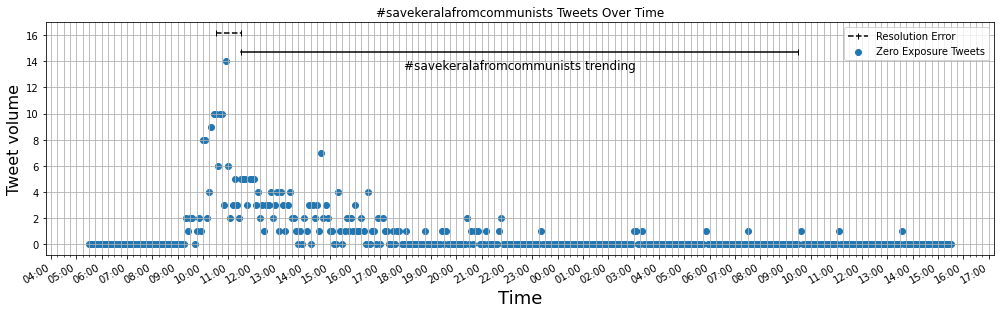

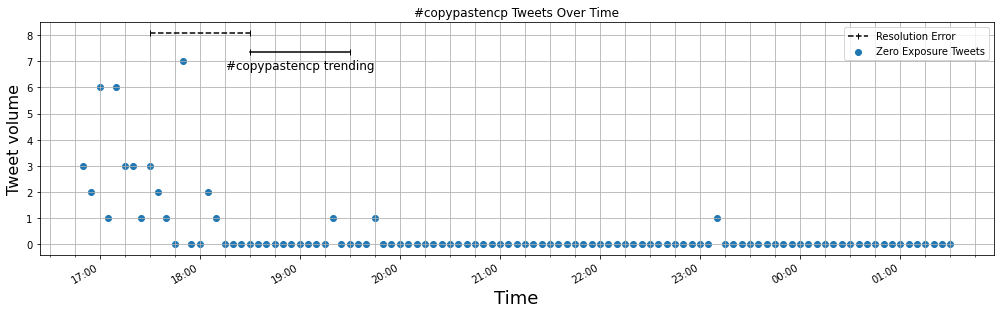

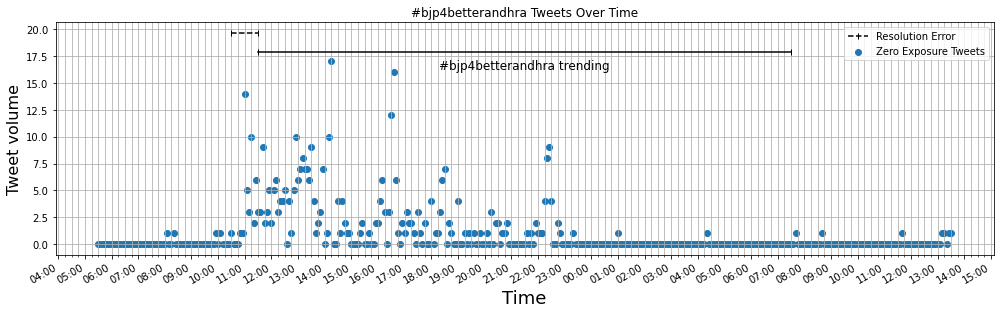

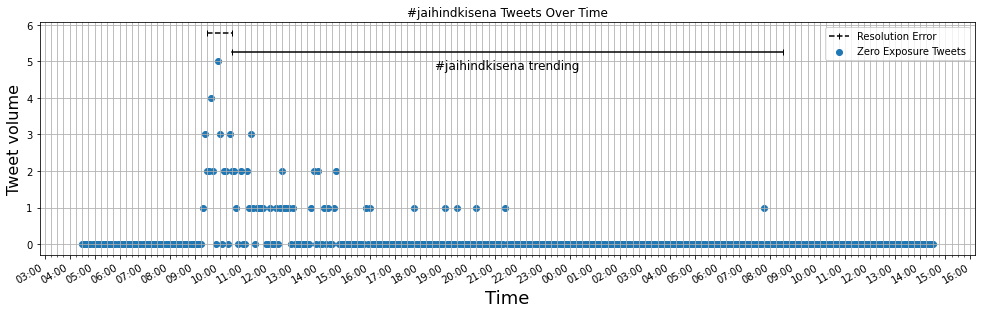

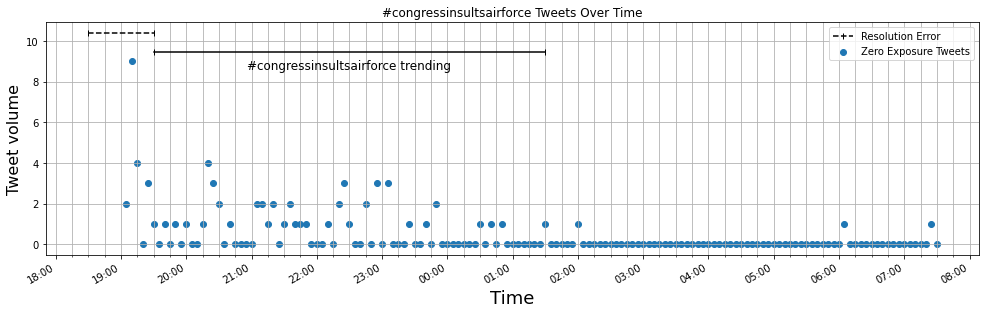

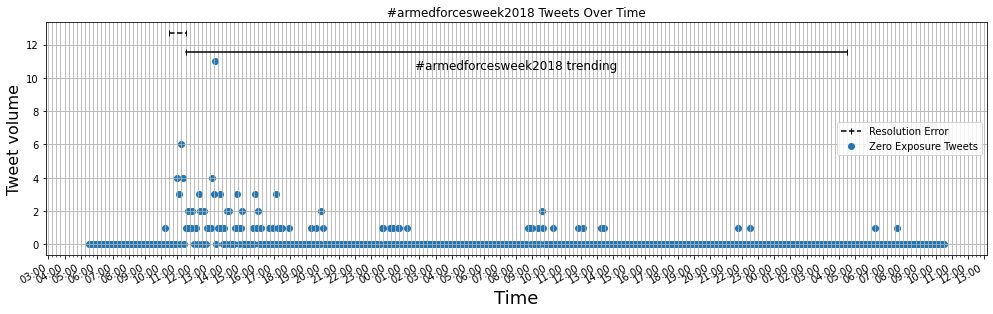

KeyError: 'bogibeelbridge'

In [226]:
for ht, ts in campaigns.items():
    plot_trending_ts(ht, ts, time_bin='5Min')


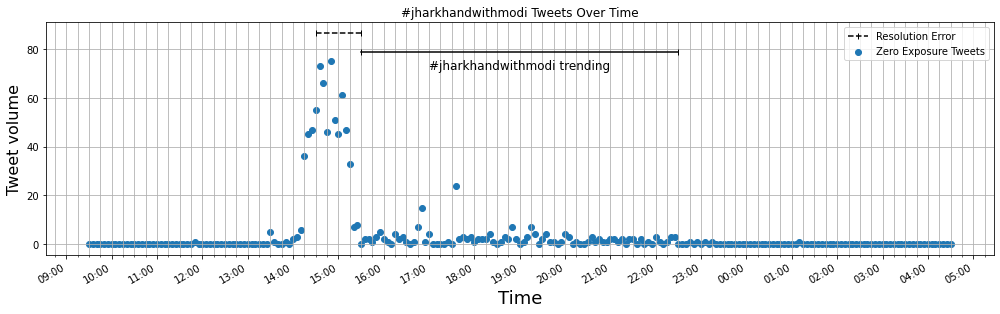

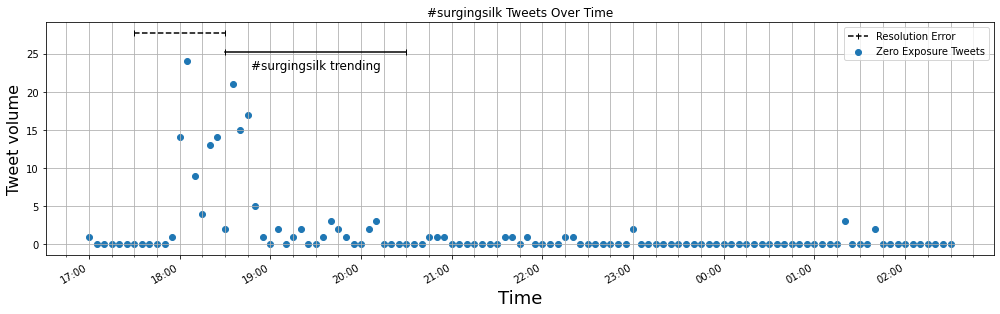

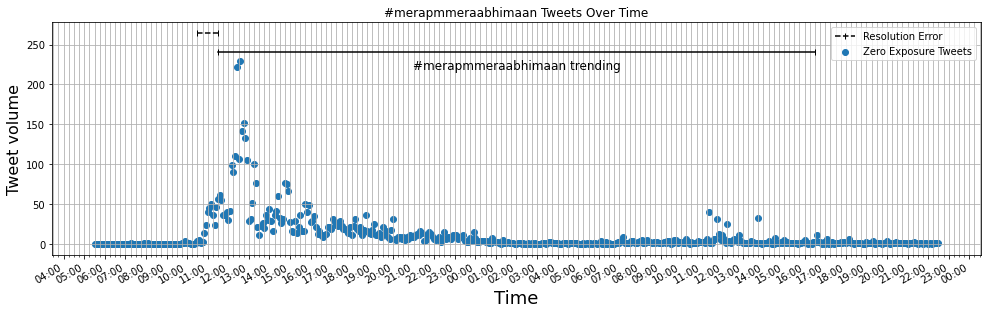

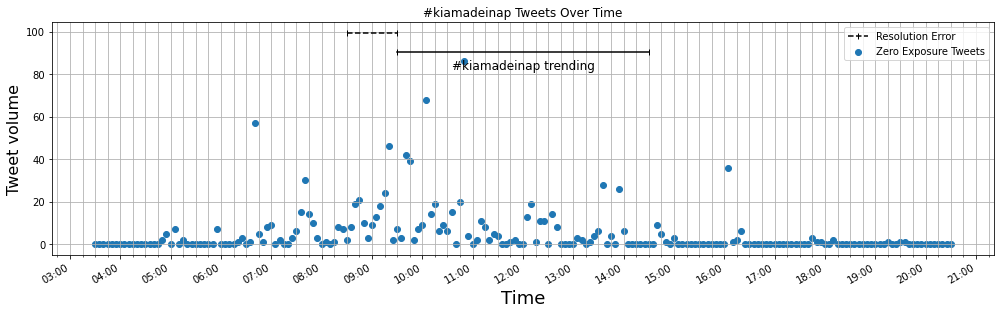

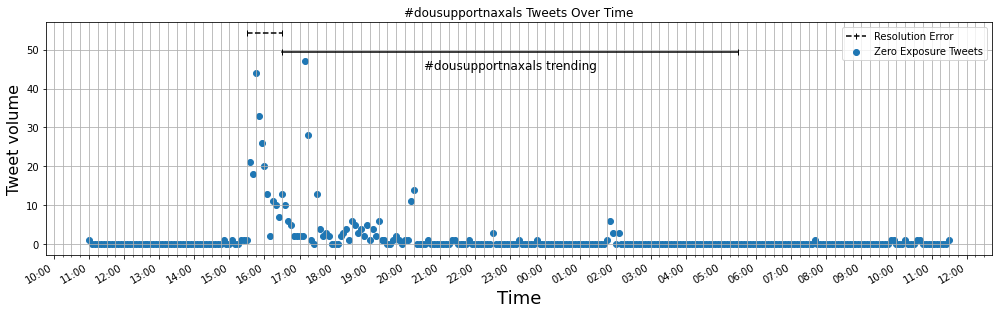

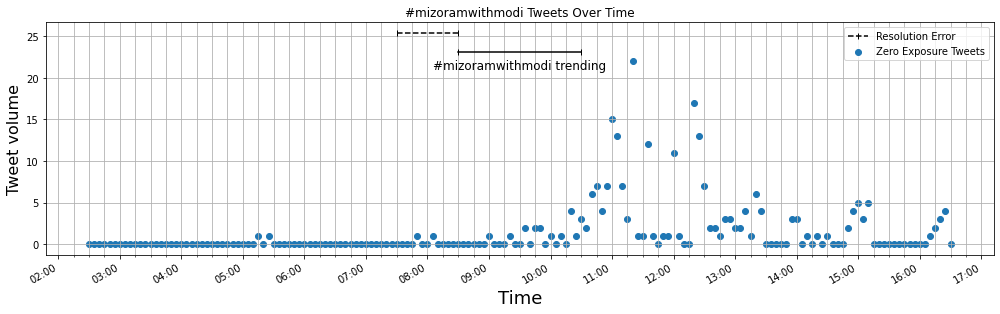

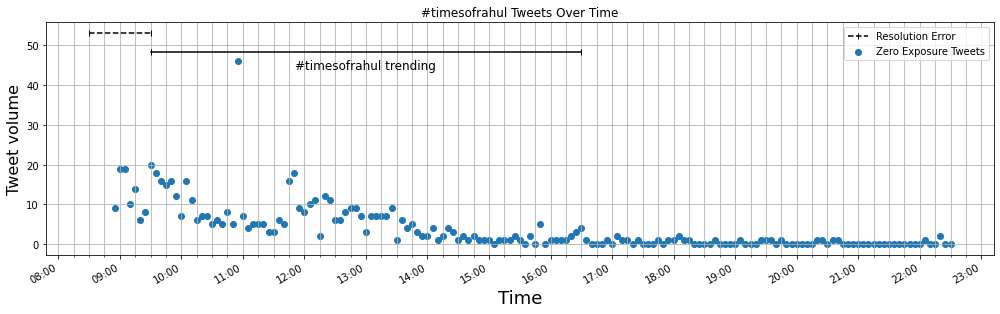

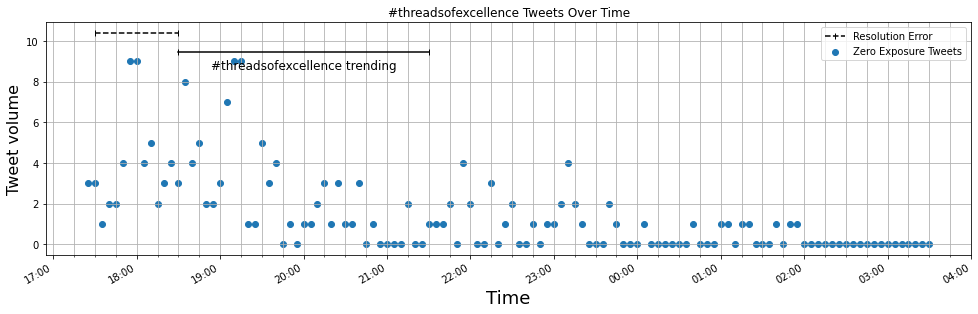

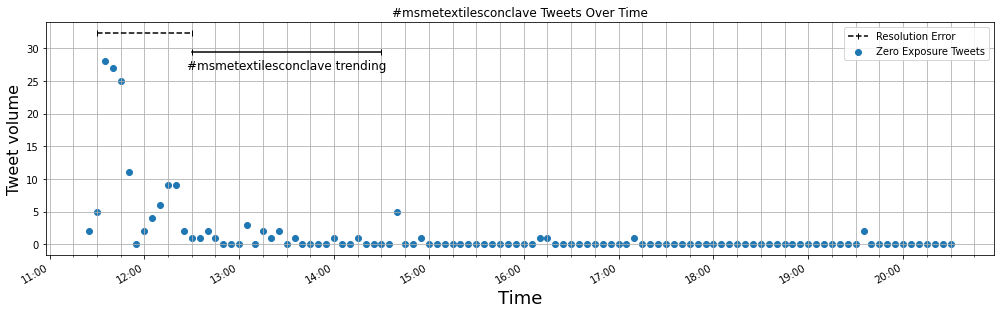

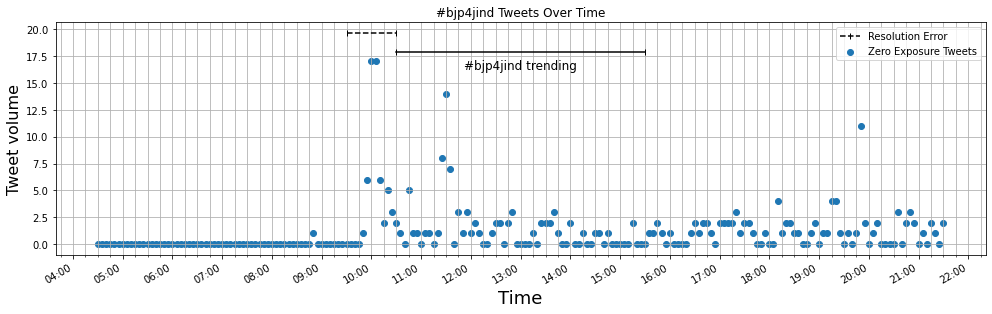

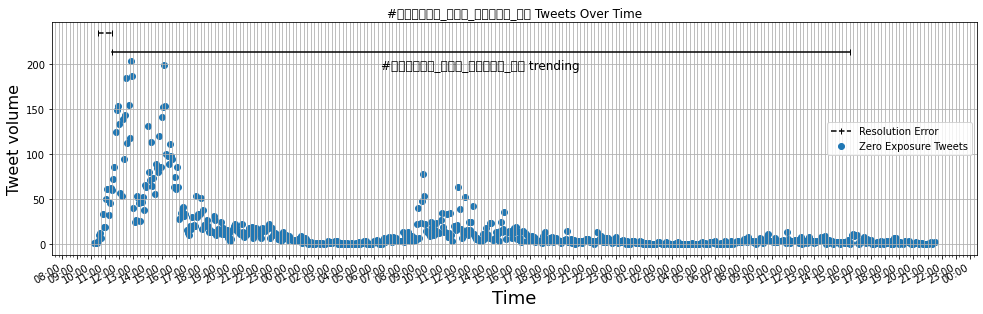

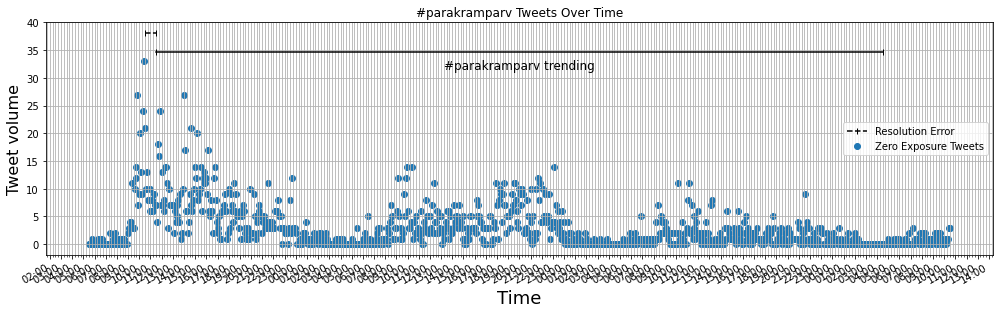

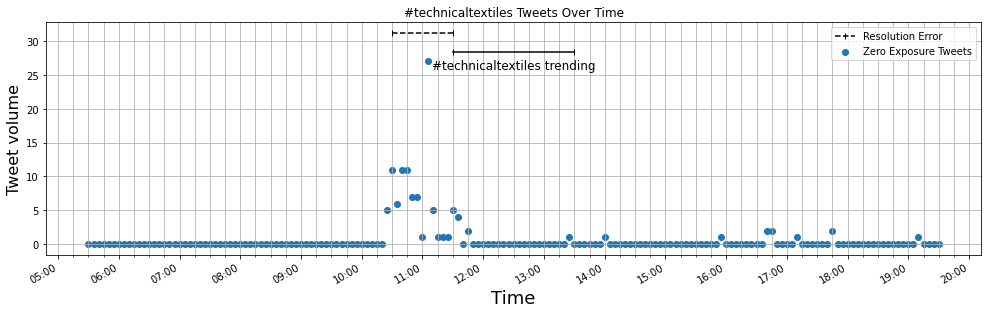

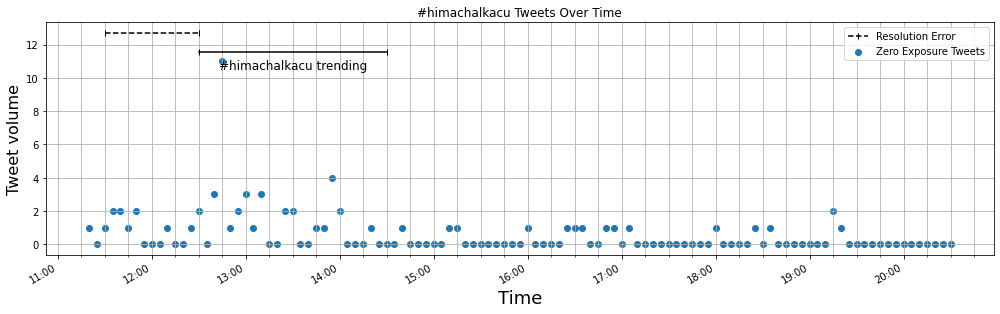

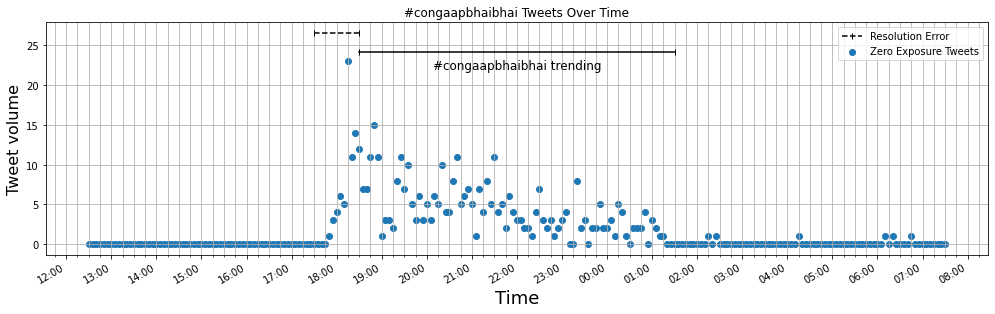

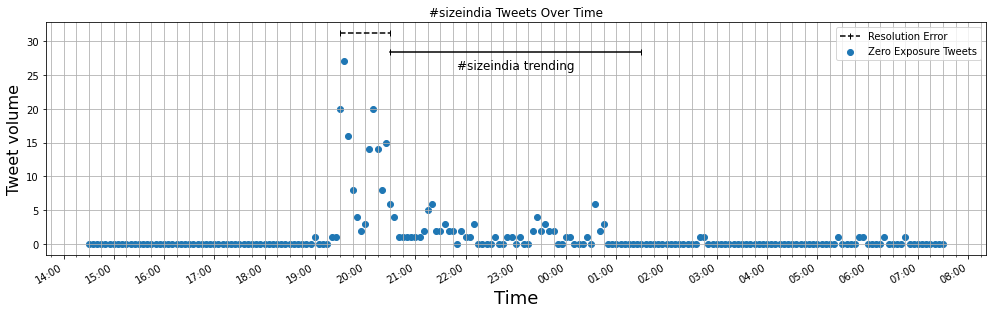

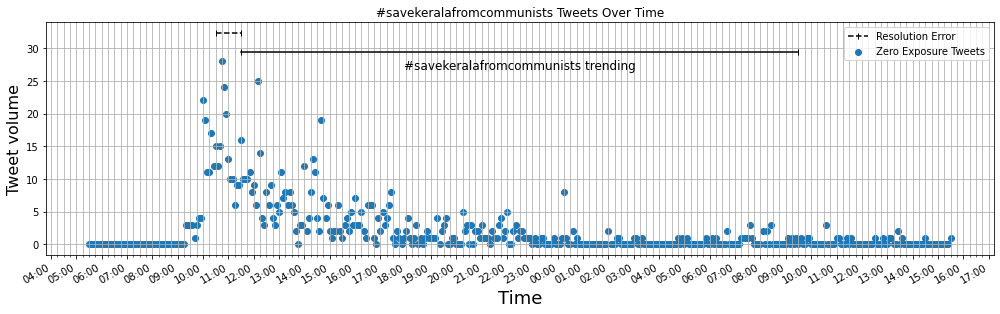

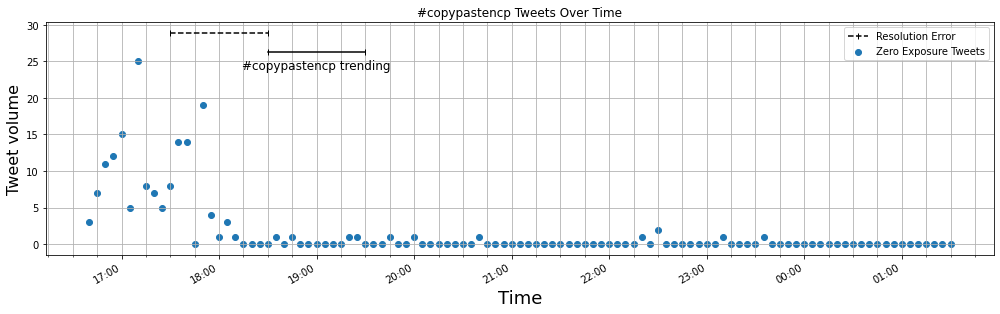

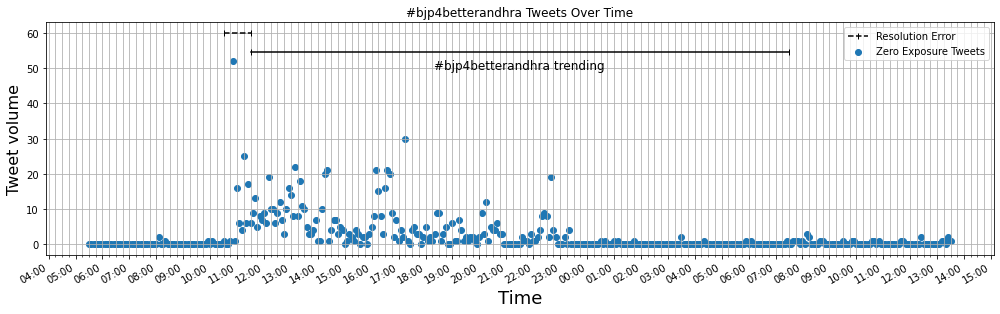

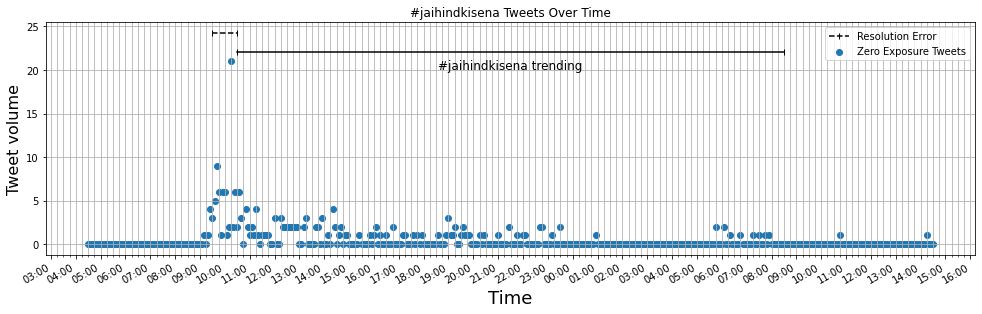

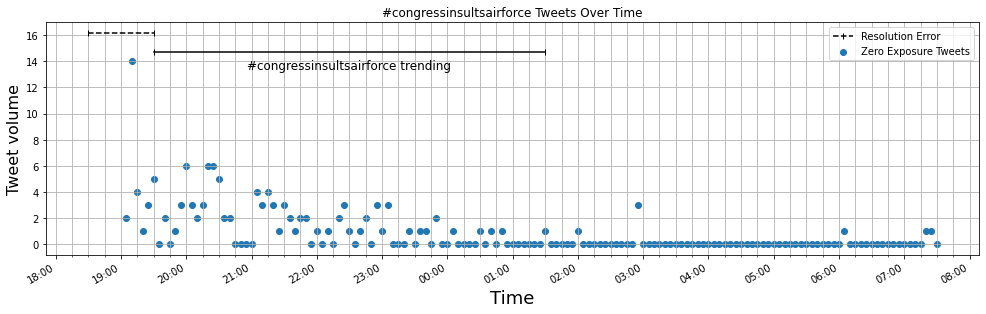

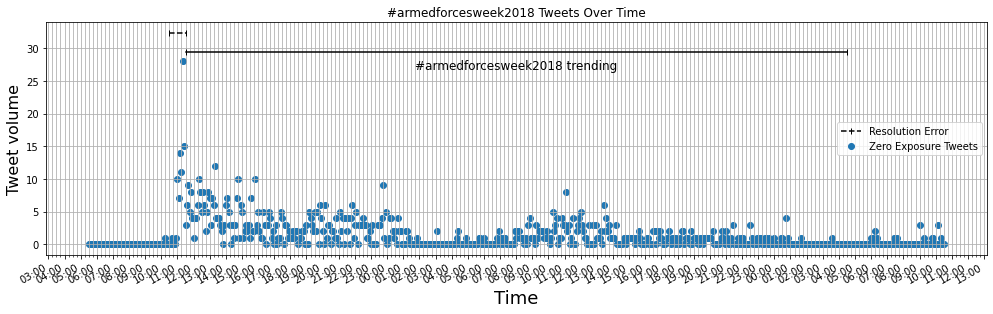

KeyError: 'bogibeelbridge'

In [82]:
# these show all tweets, including templates and retweets

for ht, ts in campaigns.items():
    plot_trending_ts(ht, ts, time_bin='5Min')

#     try:
#         plot_trending_ts(ht, ts, time_bin='5Min')
#     except:
#         print('broken', ht)

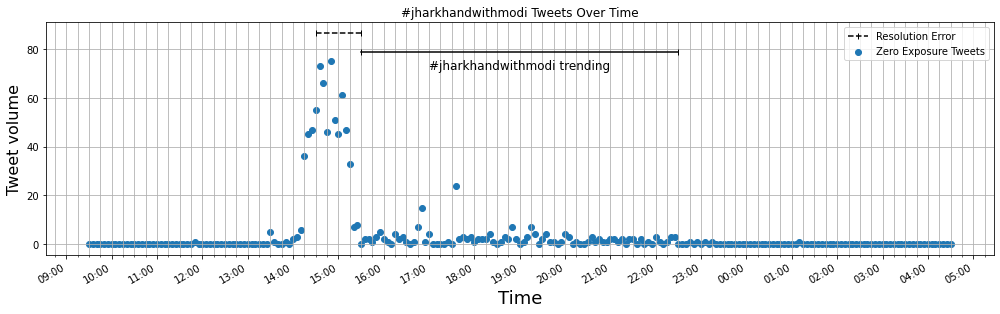

,username,id,retweet_from,template,retweet_id,text,date,retweets,favorites,adj_date,type,template_exposure,normal_exposure,total_exposure
adj_date,,,,,,,,,,,,,,
2019-09-12 11:57:01,bjp4latehar,1172033856607682560,,,,आधारभूत संरचना हो या शिक्षा या फिर स्वच्छता या...,2019-09-12 06:27:01,0,0,2019-09-12 11:57:01,regular,151,64,215
2019-09-12 16:52:28,vjay21788,1172108207499558912,ommathur_bjp,,1172063209785741312,rt @ommathur_bjp: #bharatmatakijai भारत माता क...,2019-09-12 11:22:28,140,0,2019-09-12 16:52:28,regular-retweet,146,271,417
2019-02-17 15:16:25,vagrawa3,1097069751128358914,,प्रधानमंत्री @narendramodi ने स्वच्छ भारत के ...,,प्रधानमंत्री @narendramodi ने स्वच्छ भारत के ...,2019-02-17 09:46:25,0,0,2019-02-17 15:16:25,template,5,10,15
2019-09-12 15:17:32,ashishmerkhed,1172084320225263619,bjp4india,,1172082904316334080,rt @bjp4india: चुनाव के समय मैंने आपसे कामदार ...,2019-09-12 09:47:32,456,0,2019-09-12 15:17:32,regular-retweet,59,60,119
2019-02-17 18:01:30,manishkbjp,1097111295562678276,bjp4jharkhand,2014 तक हायर सेकेंडरी स्कूलों की संख्या 653 थी...,1097067864467550208,rt @bjp4jharkhand: 2014 तक हायर सेकेंडरी स्कूल...,2019-02-17 12:31:30,6,14,2019-02-17 18:01:30,template-retweet,218,53,271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-12 12:29:44,bjym4dhanbad,1172042088378011648,isurajsinghbjym,,1172030378510405634,rt @isurajsinghbjym: रखण्ड में महिलाओं के लिए ...,2019-09-12 06:59:44,2,0,2019-09-12 12:29:44,regular-retweet,0,9,9
2019-02-17 15:48:12,ipravinsegaliya,1097077746495299586,,,,pm shri @narendramodi ji lays foundation stone...,2019-02-17 10:18:12,0,0,2019-02-17 15:48:12,regular,0,3,3
2019-09-12 13:44:39,lakshya2019,1172060945721352192,,,,झारखण्ड के 90 से ज्यादा किसान इजरायल से कृषि क...,2019-09-12 08:14:39,0,0,2019-09-12 13:44:39,regular,5,55,60


In [77]:
plot_trending_ts(hashtag, tweets, time_bin='5Min')

In [231]:
def plot_all_event_study(quantiles=(.1,.99), time_bin='5Min'):
    count = 0
    fig, ax = plt.subplots(1, 1, figsize=(14,4.5))
    for hashtag, tweet_dict in campaigns.items():
        try:
            trending_data = pd.read_csv(os.path.join(TRENDS_DIR, hashtag+'.csv'), parse_dates=['datetime'])
            start = trending_data.datetime.min() 
            end = trending_data.datetime.max() - start
            for t_id, tweet in tweet_dict.items():
                tweet['adj_date'] = tweet['date']
                if tweet['retweet_from'] == '':
                    if tweet['template'] != '':
                        tweet['type'] = 'template'
                    else:
                        tweet['type'] = 'regular'
                else:
                    if tweet['template'] != '':
                        tweet['type'] = 'template-retweet'
                    else:
                        tweet['type'] = 'regular-retweet'

                t_exp, n_exp, _ = exposures[hashtag][tweet['username']]
                tweet['template_exposure'] = t_exp
                tweet['normal_exposure'] = n_exp
                tweet['total_exposure'] = t_exp + n_exp

            df = pd.DataFrame.from_dict(tweet_dict).transpose()
            df.index = df['adj_date'] - start 

            min_date = start - start - timedelta(hours=6)
            max_date = start - start + timedelta(hours=6)

            temp = df[df.type == 'regular'] # only use regular tweets
            temp = temp[temp.total_exposure == 0].resample(time_bin).count().username.loc[min_date:max_date]
            def to_minutes(x):
                return int(x.total_seconds() / 60)
            temp.index = temp.index.map(to_minutes) 
            ax.plot(temp.index, temp, alpha=.4)#, label='Zero Exposure Tweets')
            #    temp.plot(style='.', ax=ax, label='Zero Exposure Tweets')

            _, max_hist_level = ax.get_ylim()
            
            count += 1 
            if count > 30:
                break

        except:
            print(hashtag, 'did not work')
    ax.plot([-60, 0], [max_hist_level*1.1]*2, '|--', color='black', alpha=1, 
             label='Resolution Error') 
    ax.plot([0, 360], [max_hist_level]*2, '-', color='black', alpha=1) 
    ax.plot([0, 360], [max_hist_level]*2, '|', color='black') 
    ax.text(0 + (360)/2, max_hist_level/1.1, f'Hashtag Trending', fontsize=12, horizontalalignment='center')

            
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend()
    plt.xlabel('Minutes Since Trending', fontsize=18)
    plt.ylabel('Tweet volume', fontsize=16)
    plt.title(f'Impact of Hashtag Trending on Zero-Exposure Tweets')
    plt.tight_layout()

    plt.show()

bogibeelbridge did not work
hooghly_chalo did not work
goodgovernanceday did not work


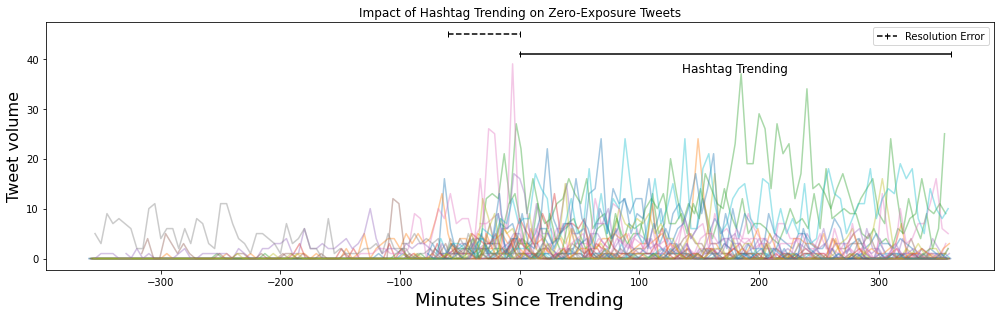

In [232]:
x = plot_all_event_study()

In [12]:
def plot_event_study(hashtag, tweet_dict, quantiles=(.1,.99), include_trend=True):
    # plot tweets by type as a histogram
    # shows trending period, and a little bit before and after,
    trending_data = pd.read_csv(os.path.join(TRENDS_DIR, hashtag+'.csv'), parse_dates=['datetime'])
  
    start = trending_data.datetime.min()
    
    def to_minutes(x):
        return int(x.total_seconds() / 60)
        
    
    end = to_minutes(trending_data.datetime.max() - start)    
    
    for t_id, tweet in tweet_dict.items():
        tweet['adj_date'] = to_minutes(tweet['date'] - start)
        if tweet['retweet_from'] == '':
            if tweet['template'] != '':
                tweet['type'] = 'template'
            else:
                tweet['type'] = 'regular'
        else:
            if tweet['template'] != '':
                tweet['type'] = 'template-retweet'
            else:
                tweet['type'] = 'regular-retweet'

    df = pd.DataFrame.from_dict(tweet_dict).transpose()


    fig, ax = plt.subplots(1, 1, figsize=(14,4.5))
    
    min_date, max_date = -100, end
    #min_date = start - timedelta(hours=3)
    #max_date = end + timedelta(hours=3)

    (n, bins, patches) = ax.hist([df[df.type=='template'].adj_date, 
              df[df.type=='template-retweet'].adj_date,
              df[df.type=='regular'].adj_date,
              df[df.type=='regular-retweet'].adj_date,
             ],
            label=["Template tweets", "Template retweets", 
                    "Non-Template tweets", "Non-Template retweets",
                  ],
             color=["red","orange",'black','grey'], 
             stacked=True, alpha=0.6, bins=100, range=(min_date,max_date), cumulative=False, rwidth=0.9)
    
    _, max_hist_level = ax.get_ylim()
    plt.plot([0, end], [max_hist_level]*2, '-', color='black', alpha=1) 
    plt.plot([0, end], [max_hist_level]*2, '|', color='black') 
    plt.text(end/2, max_hist_level/1.1, f'#{hashtag} trending', fontsize=12, horizontalalignment='center')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.legend()
    plt.xlabel('Minutes Since Trending', fontsize=18)
    plt.ylabel('Tweet volume', fontsize=16)
    plt.title(f'#{hashtag} Tweets Over Time')
    plt.tight_layout()
    plt.show()
    
    return df

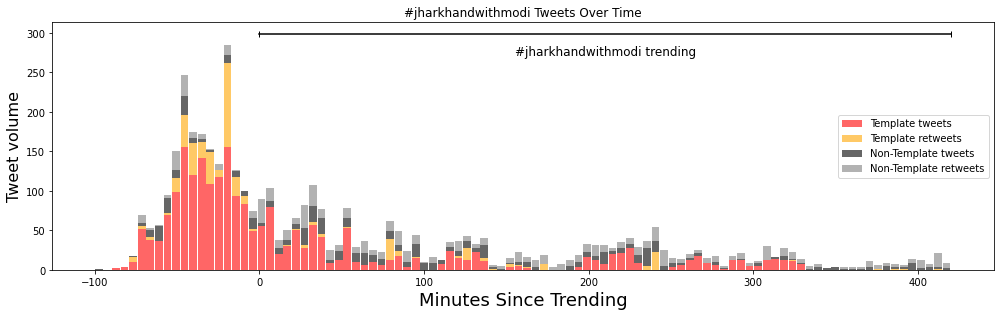

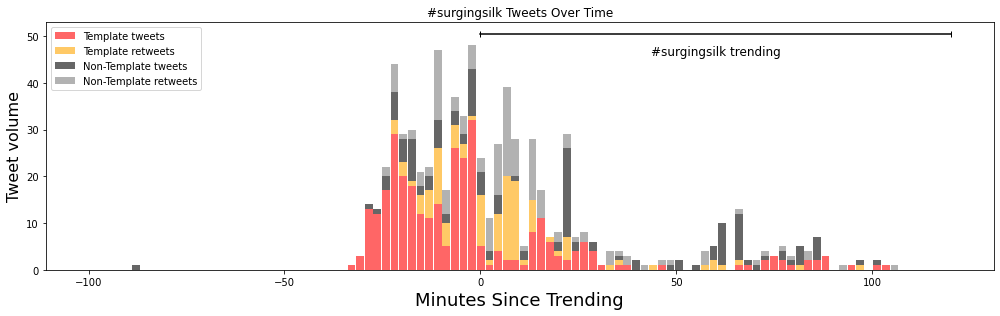

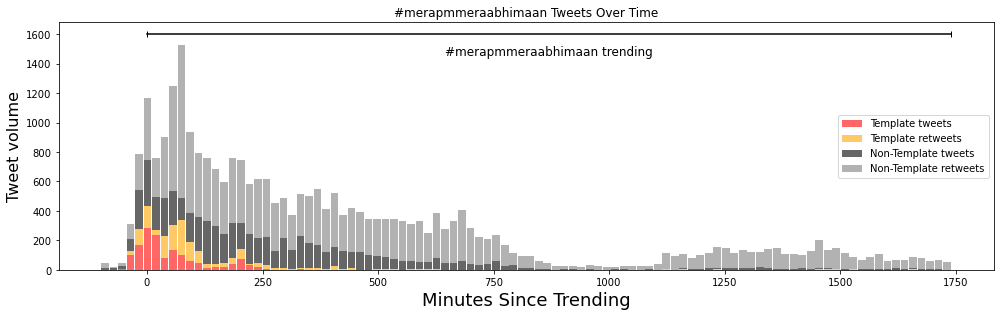

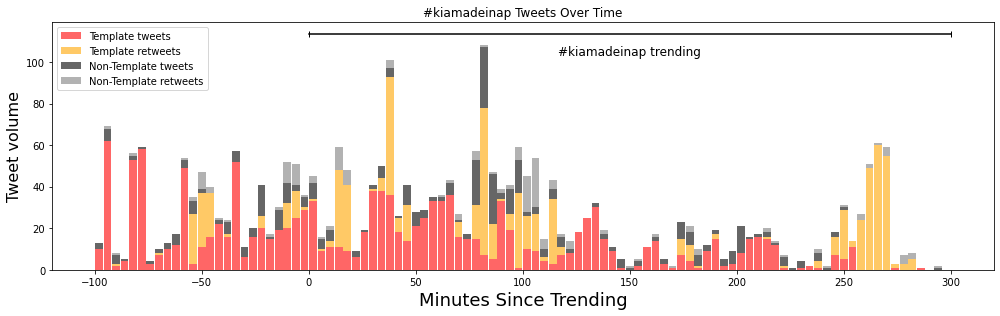

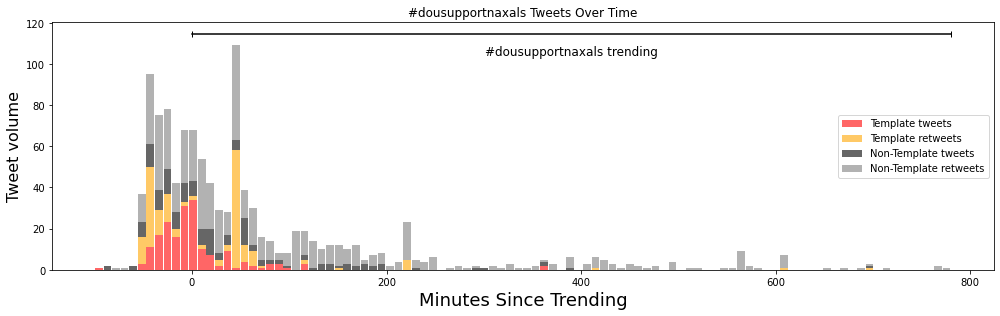

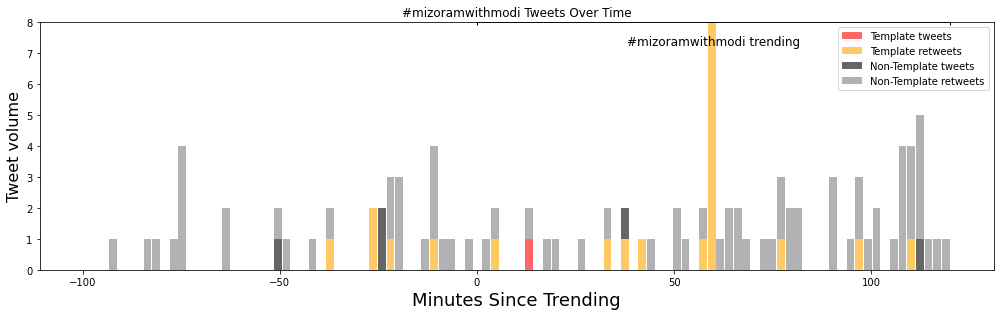

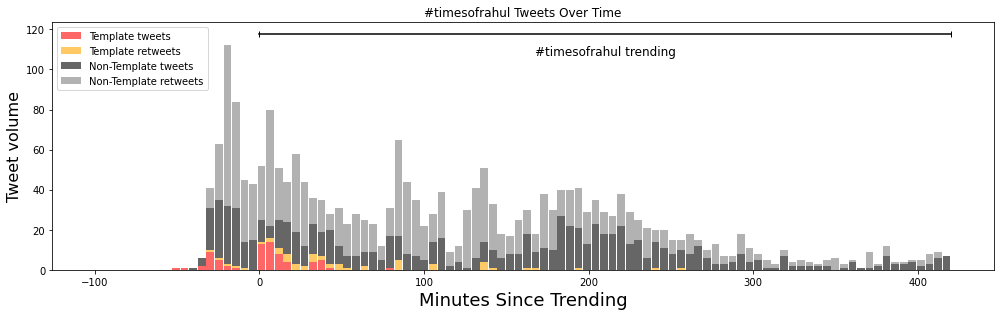

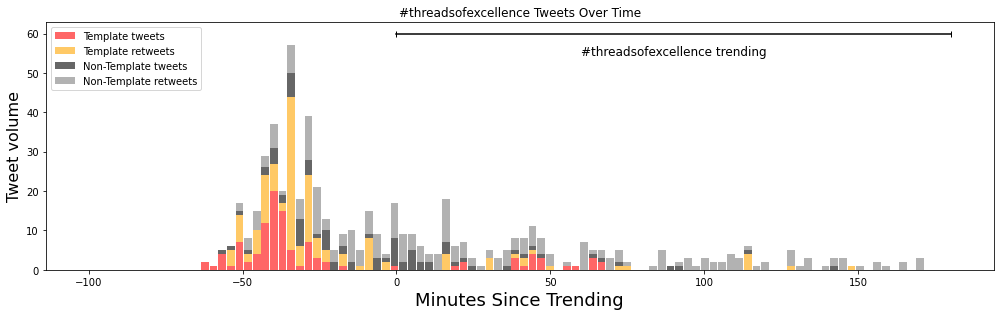

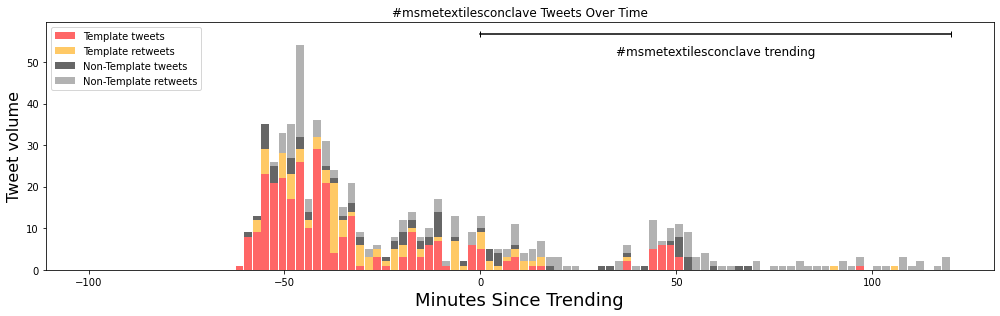

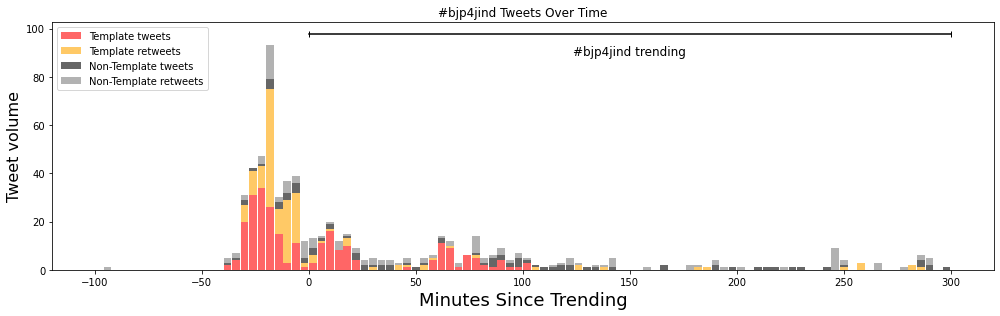

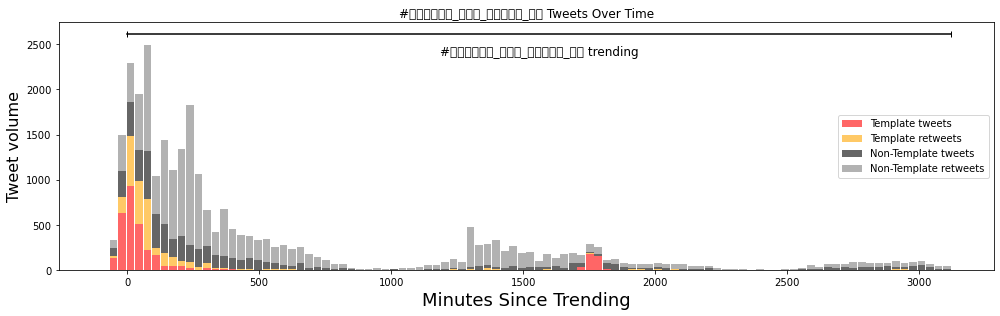

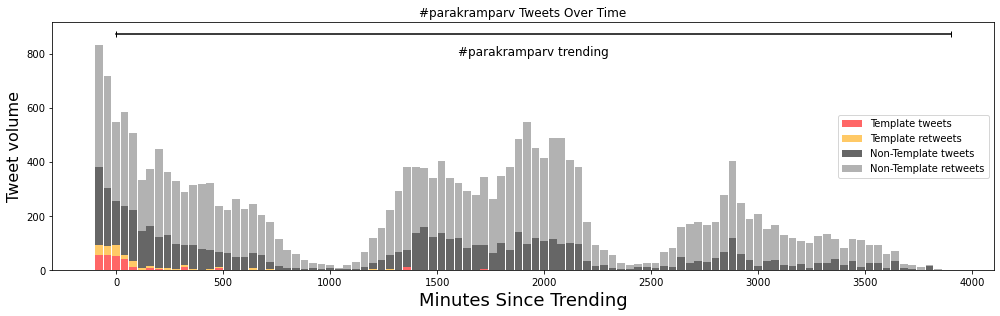

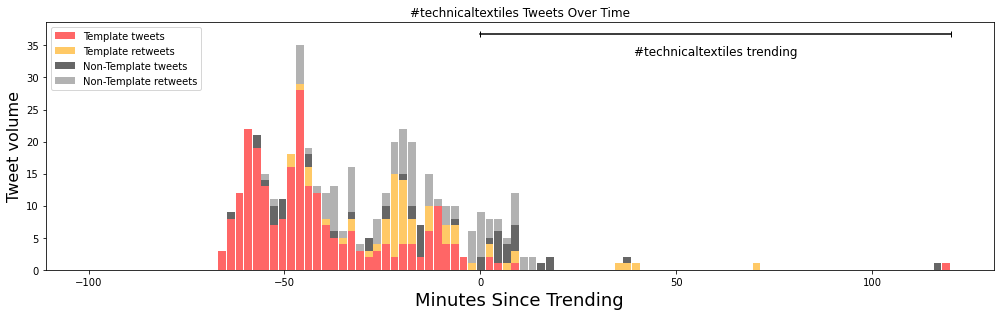

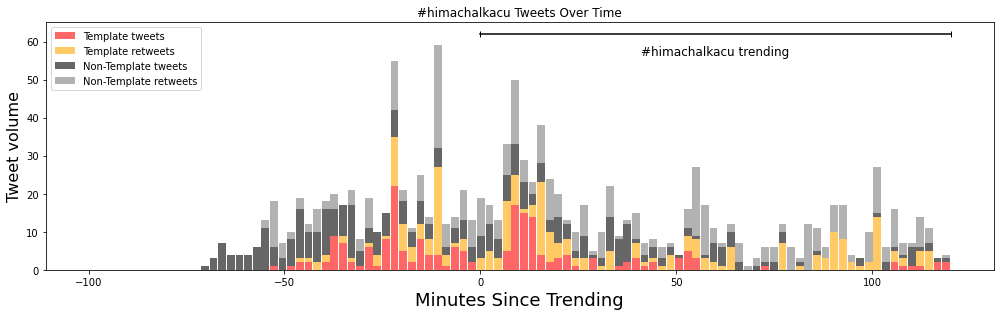

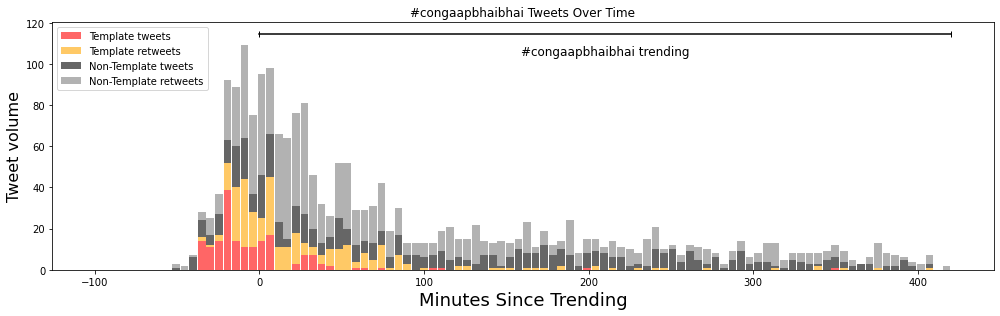

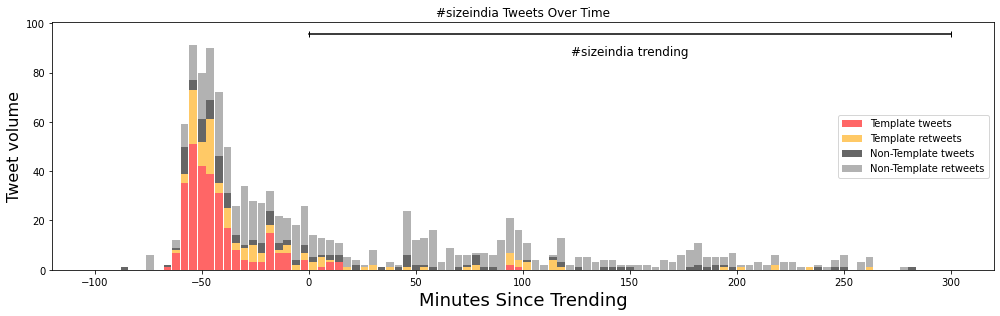

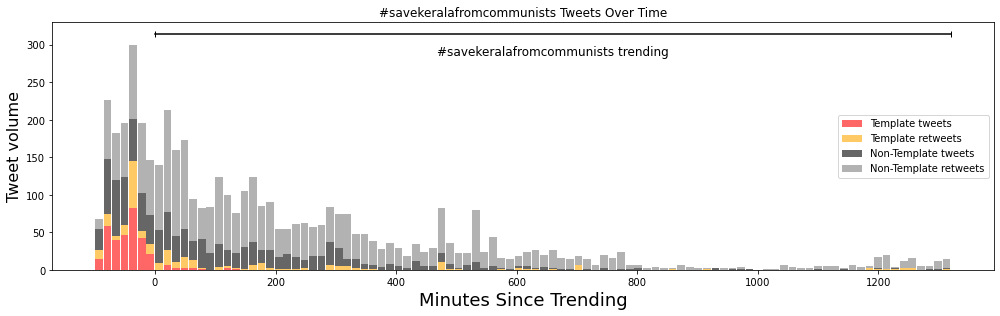

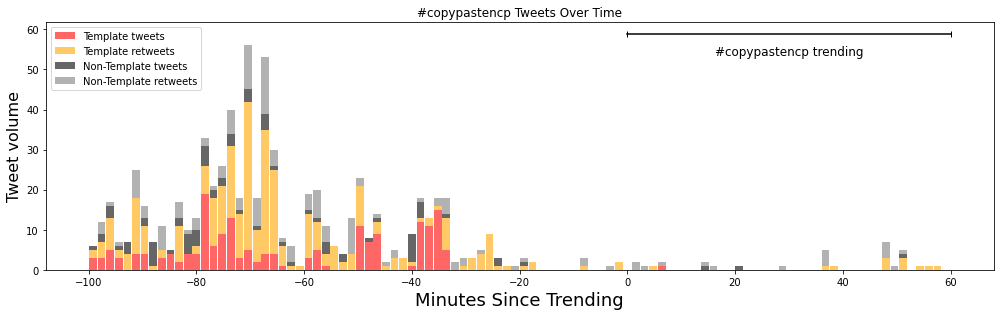

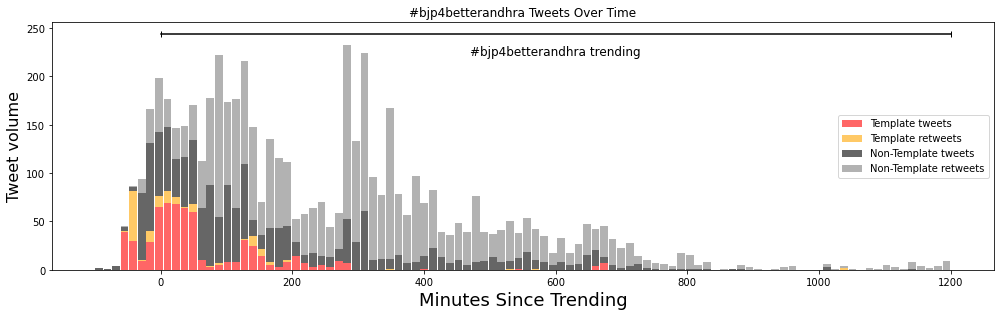

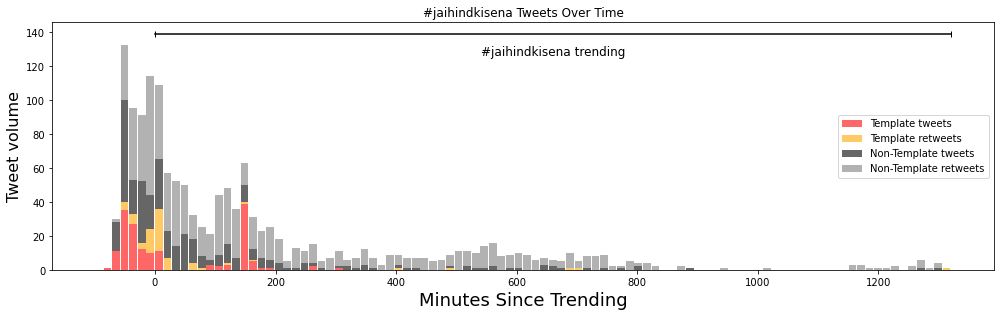

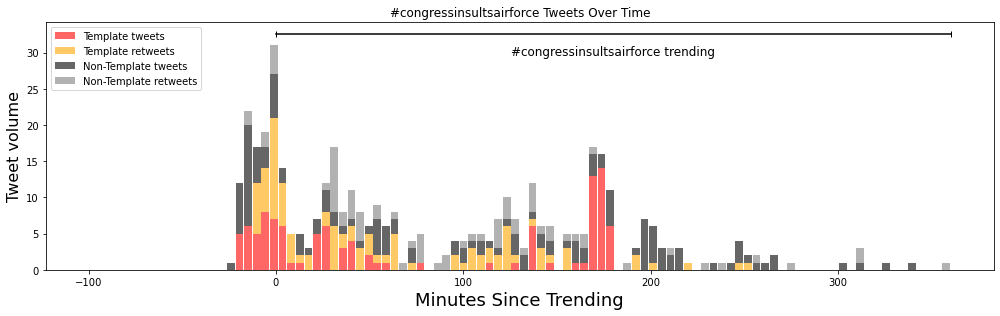

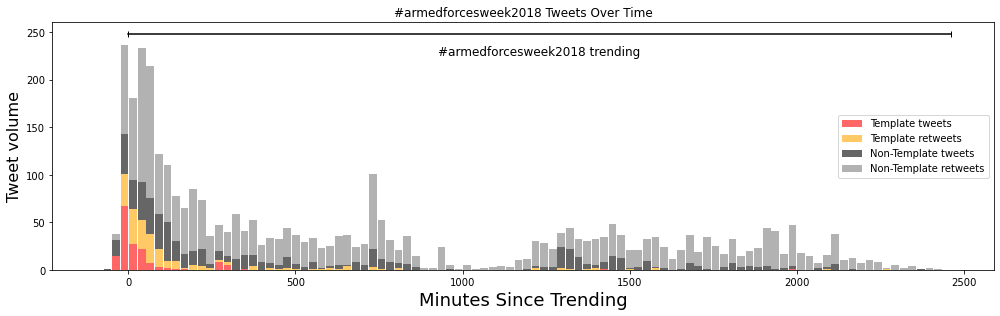

broken bogibeelbridge


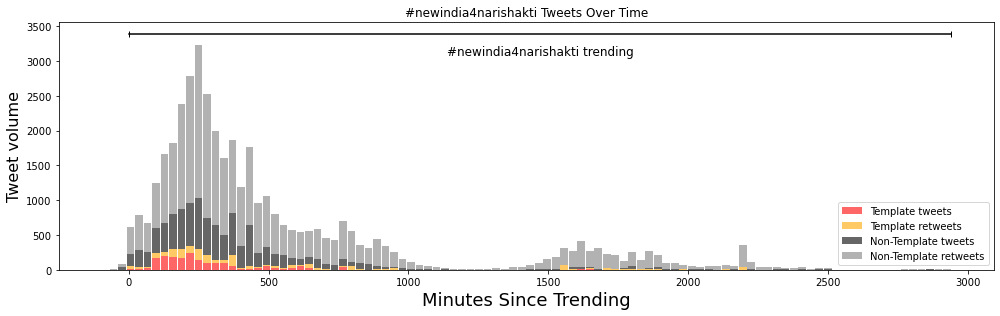

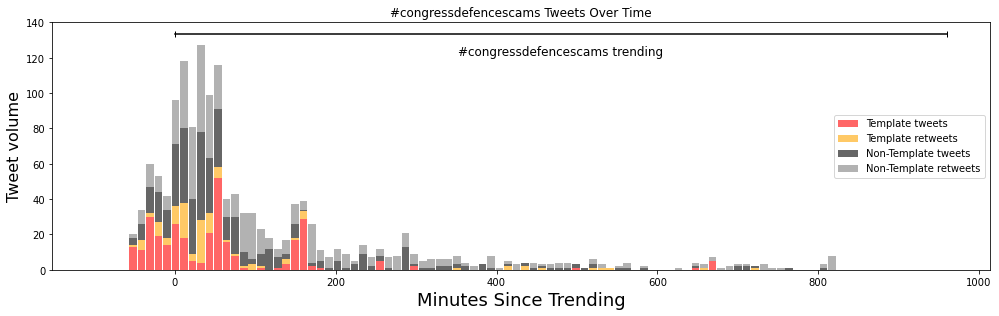

broken hooghly_chalo


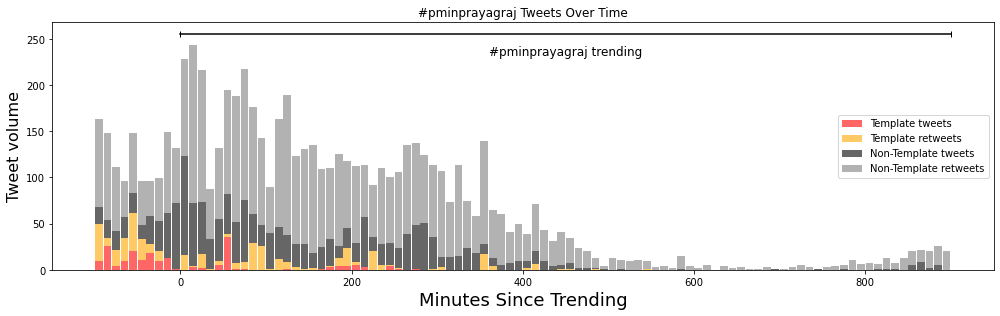

broken goodgovernanceday


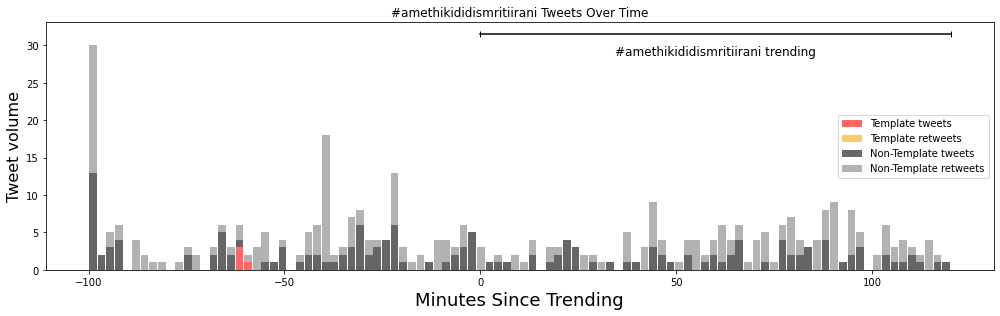

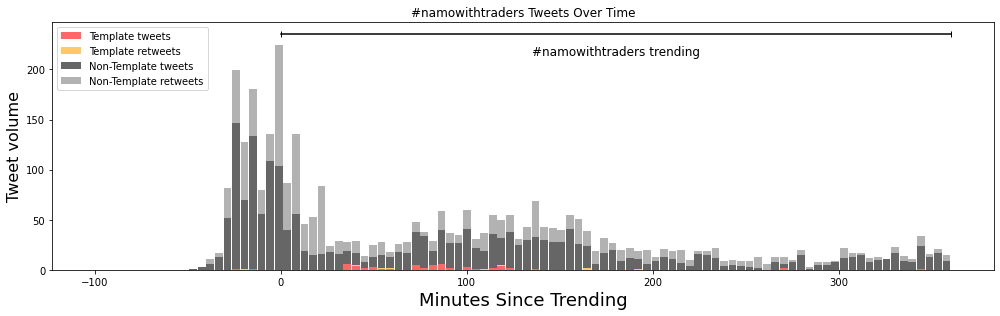

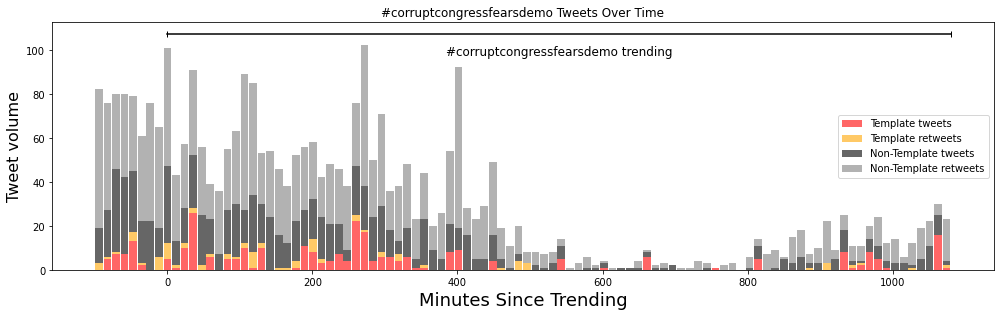

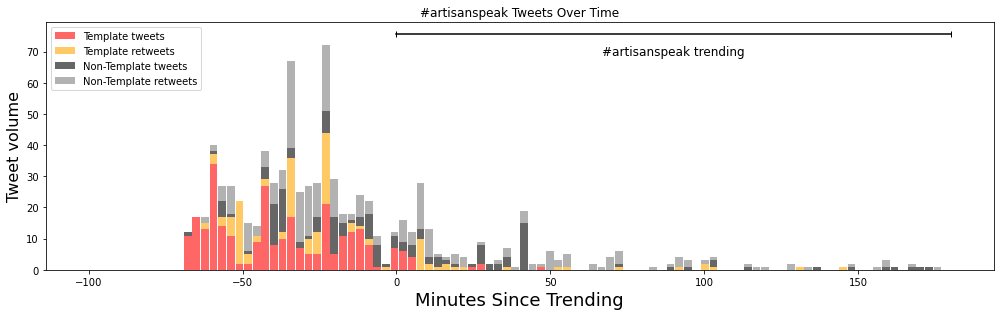

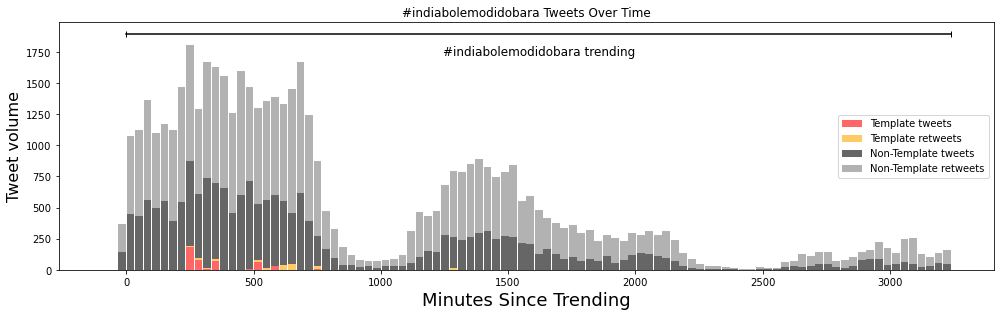

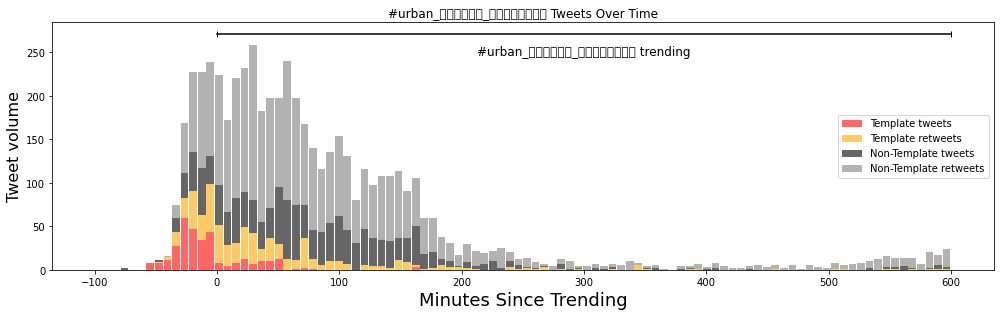

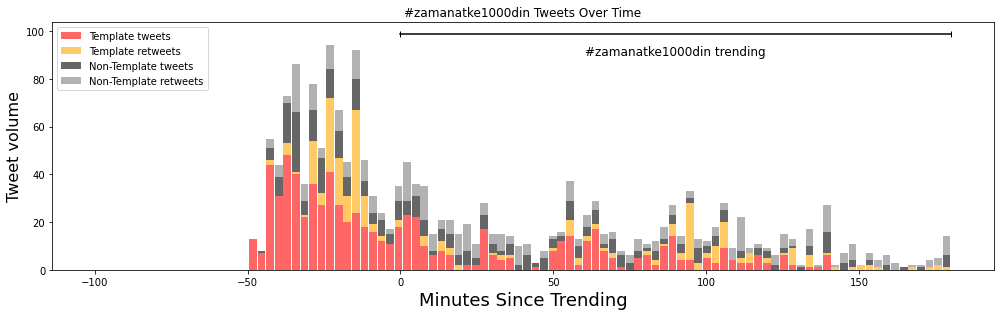

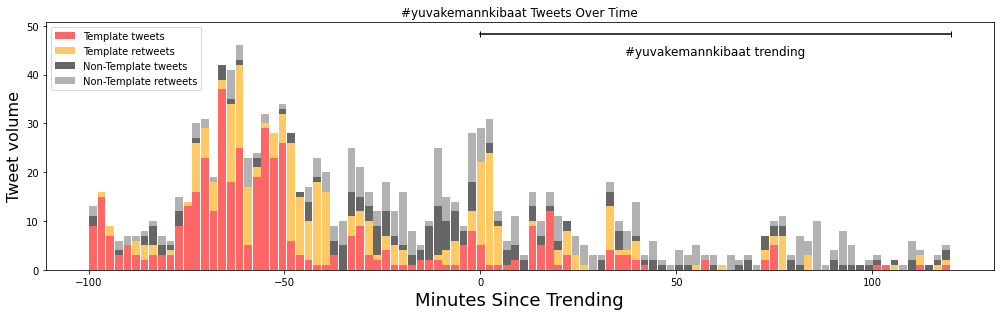

broken congressframedamitshah


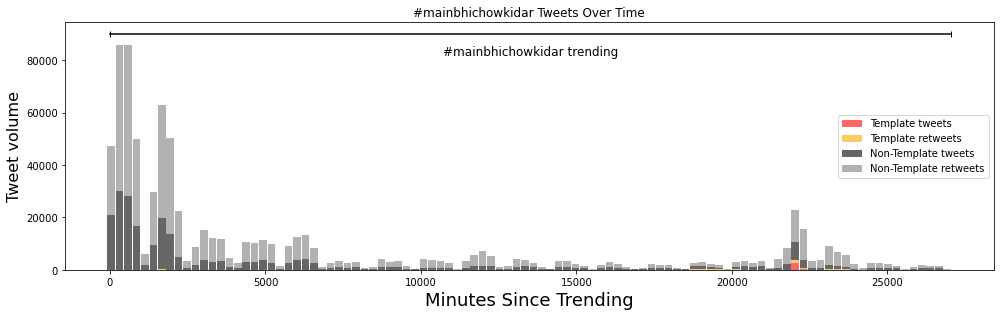

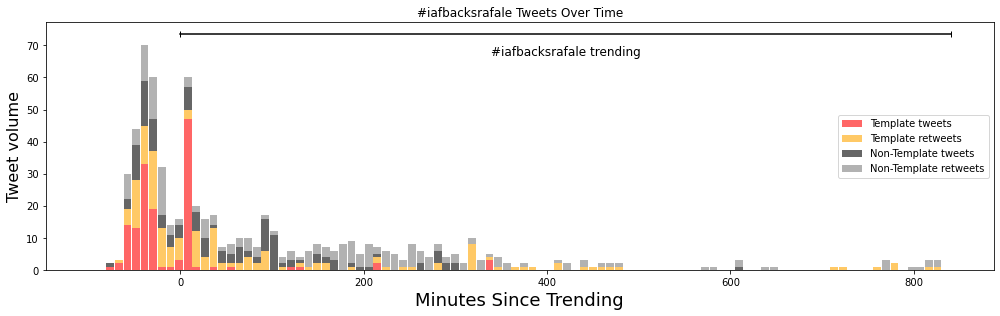

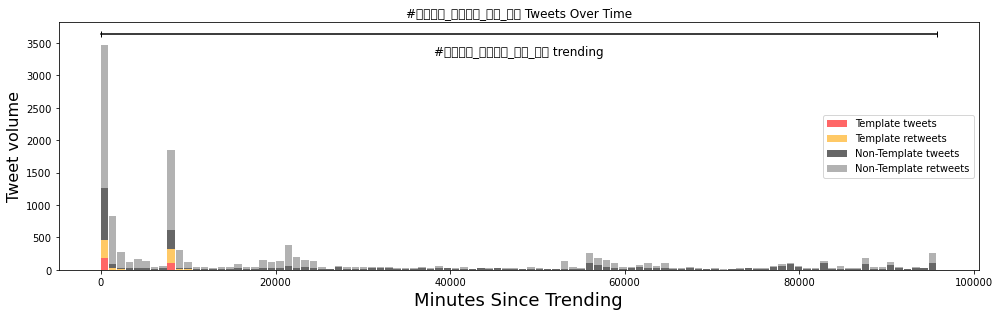

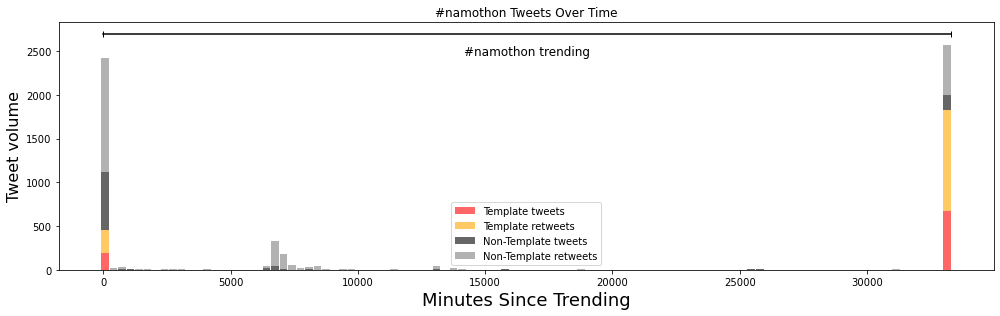

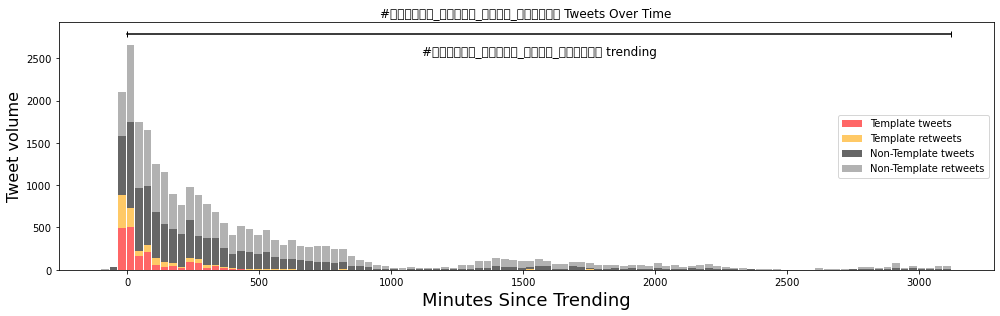

broken congressagainstnationalsecurity


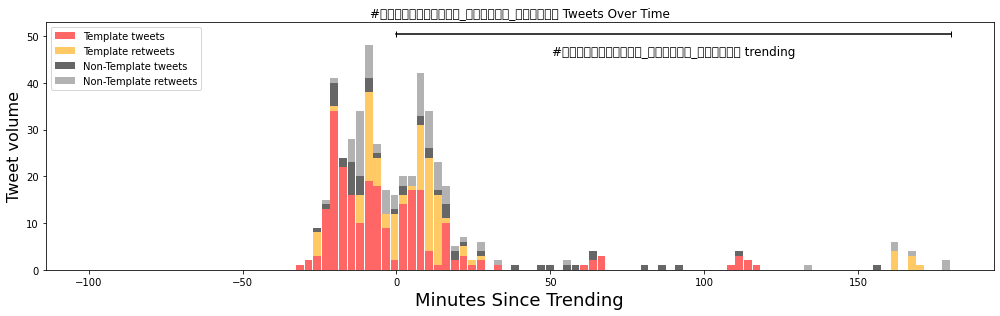

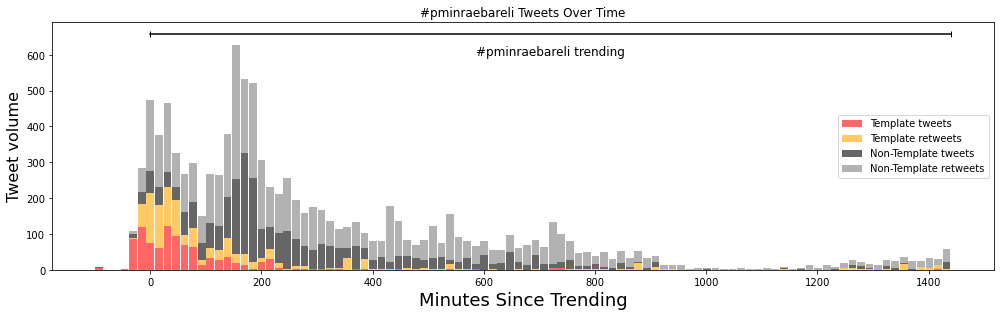

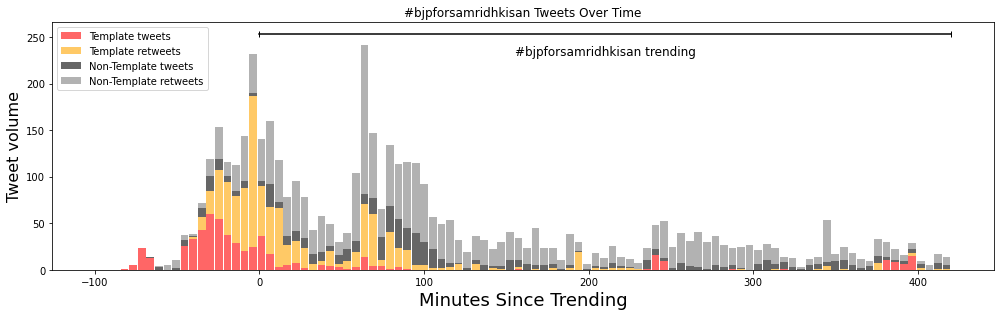

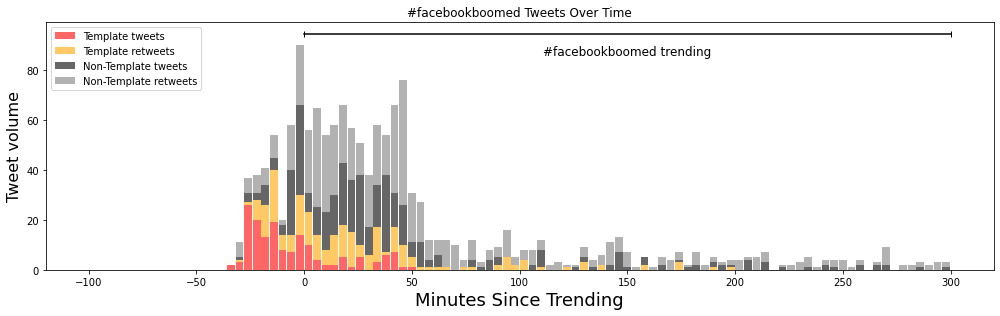

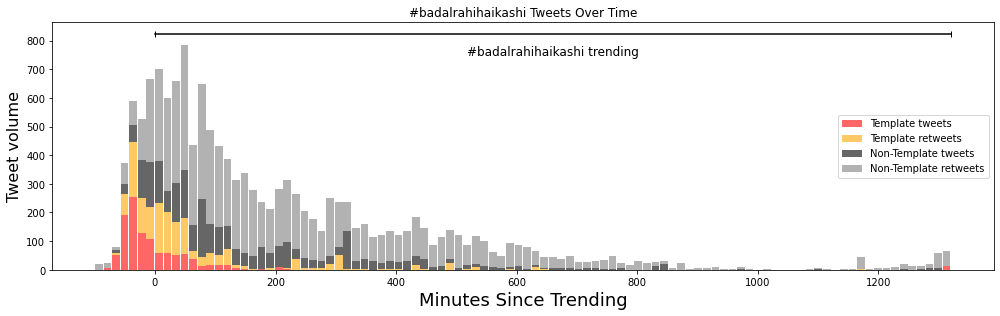

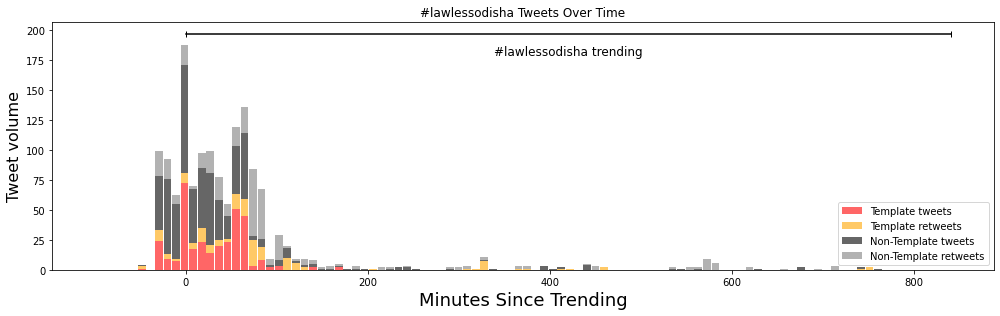

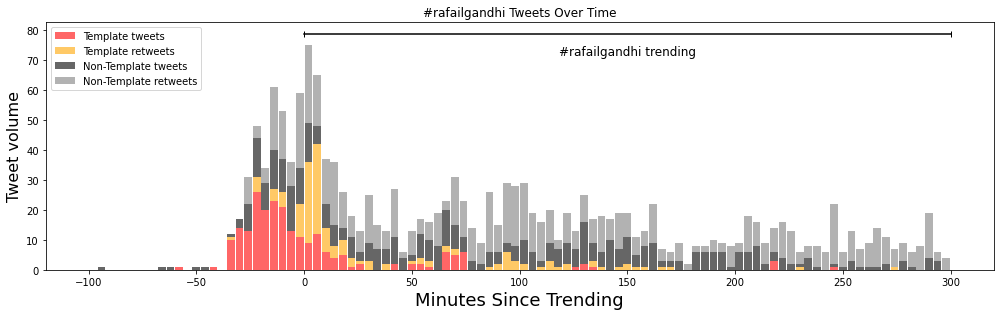

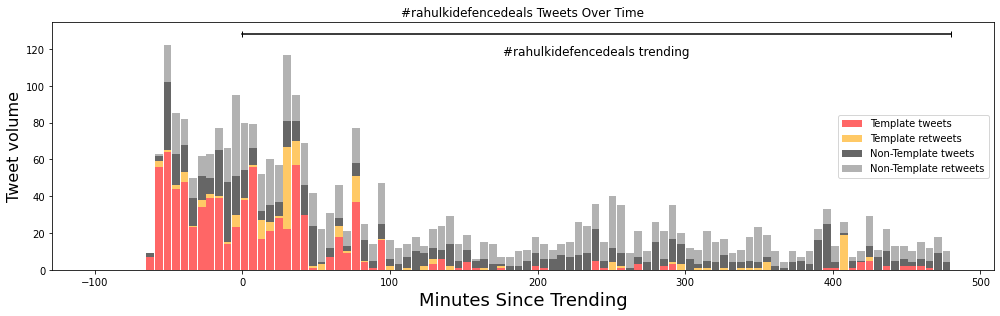

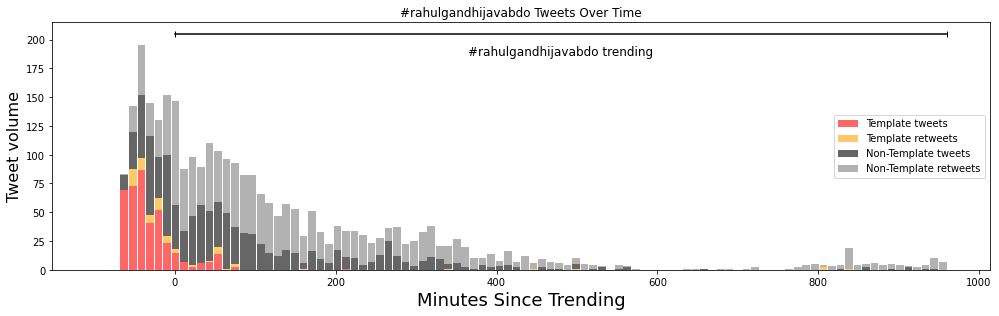

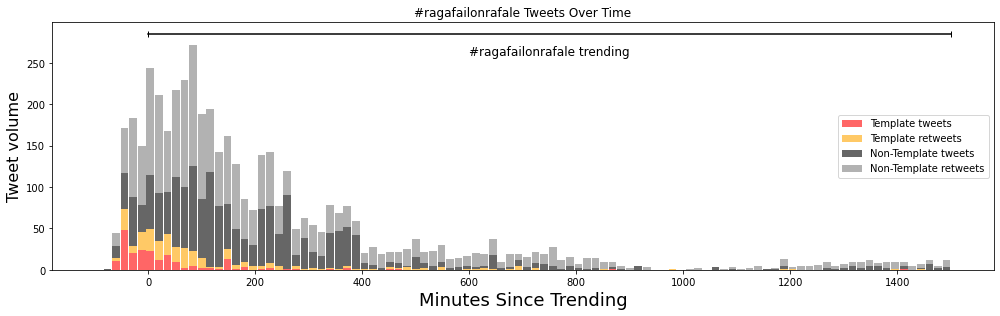

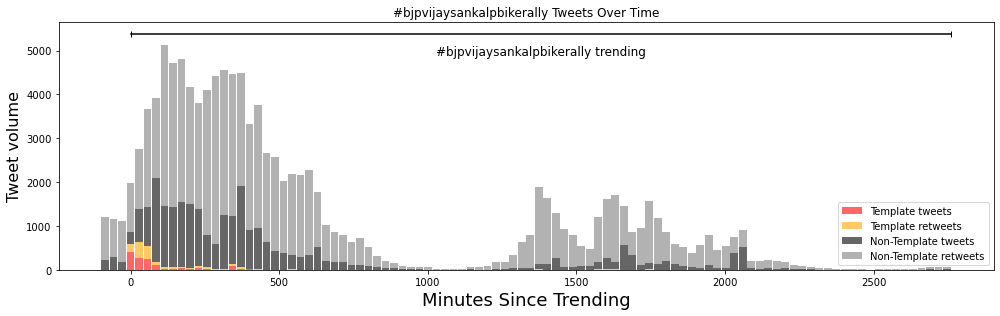

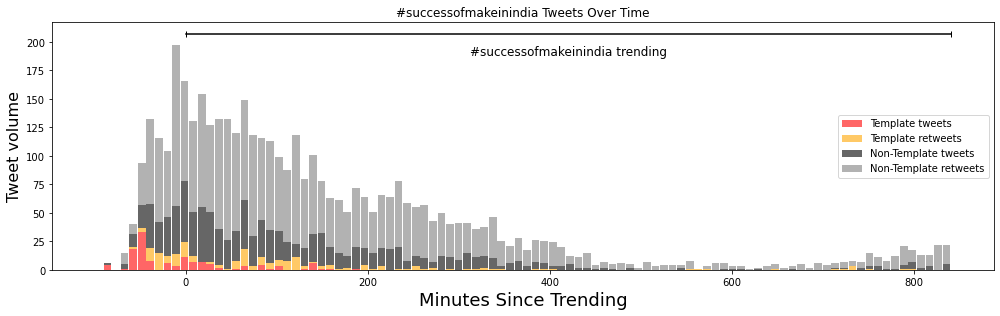

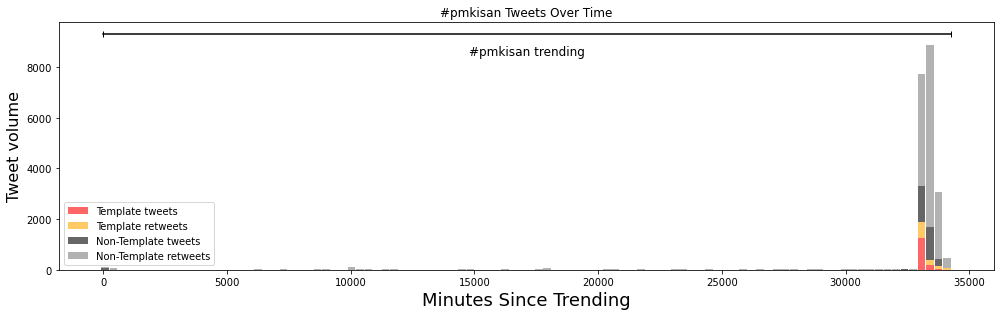

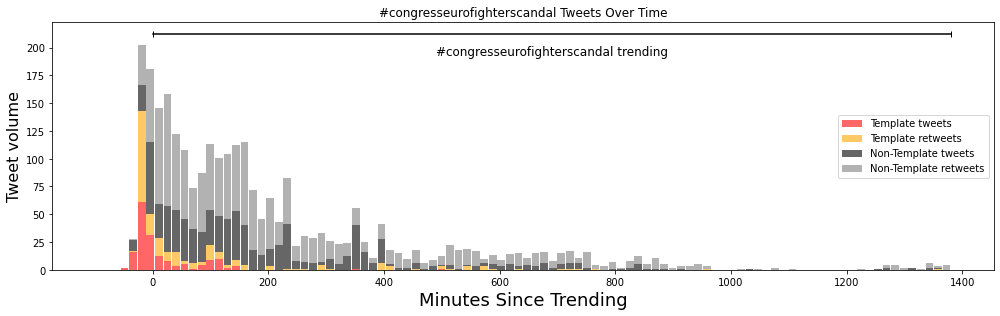

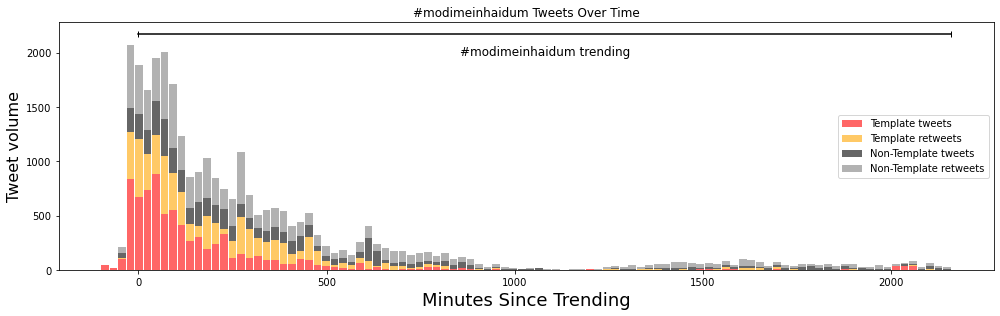

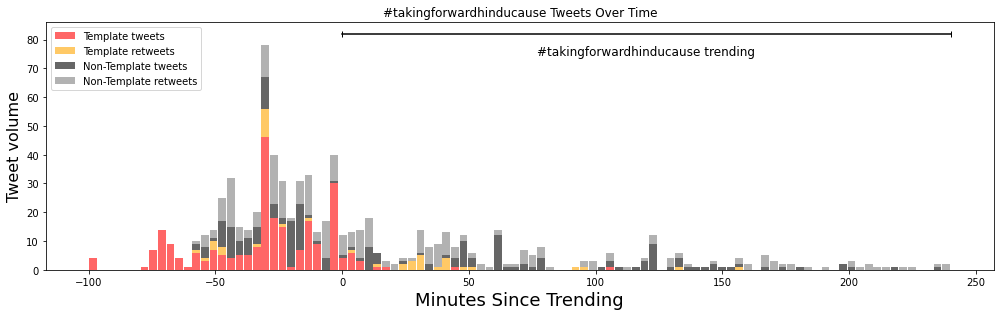

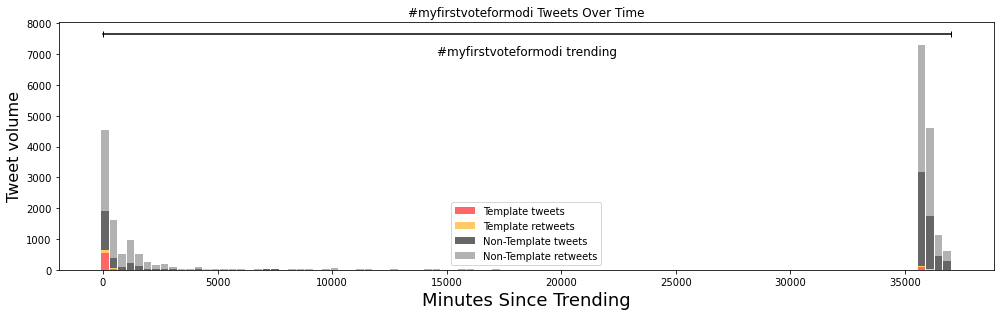

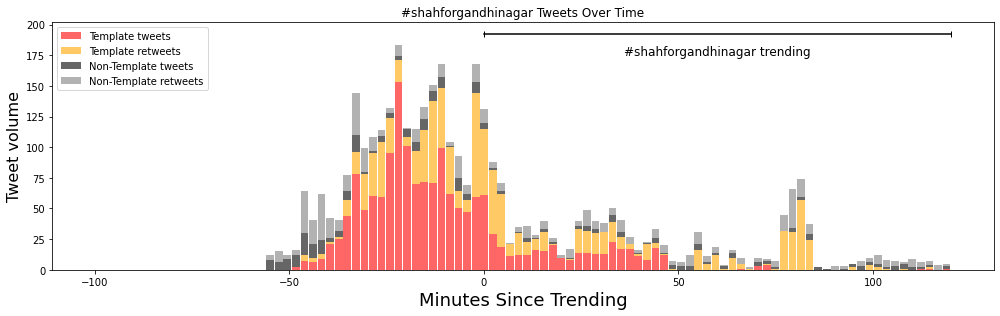

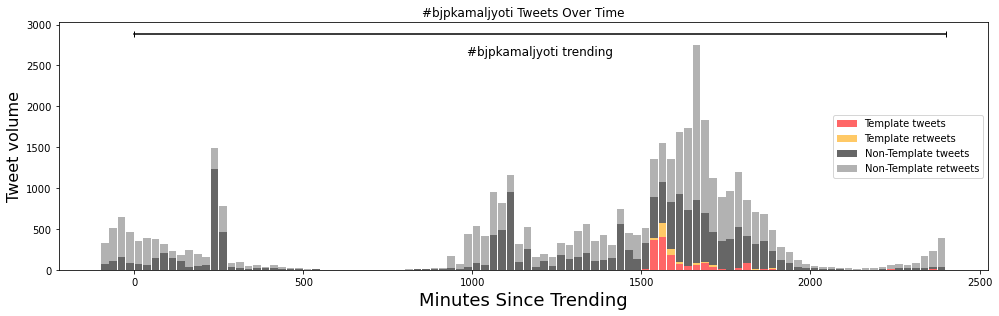

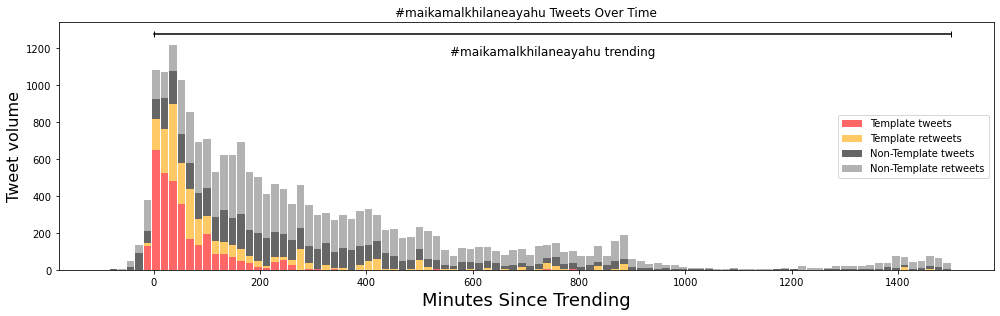

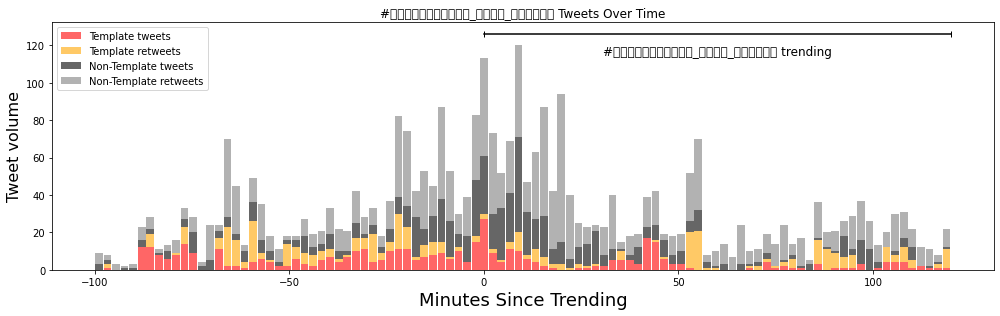

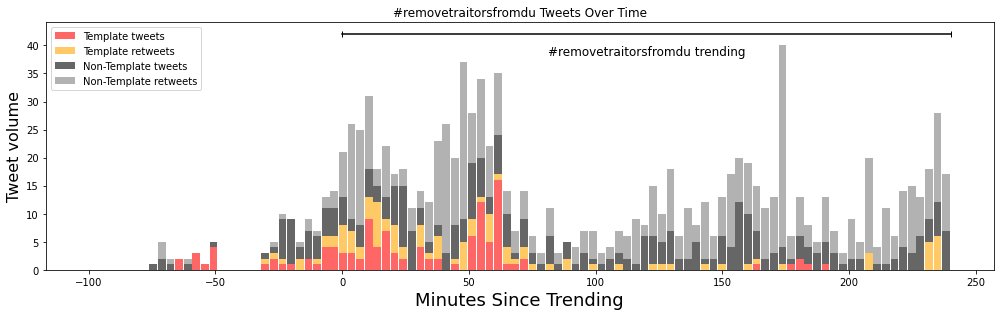

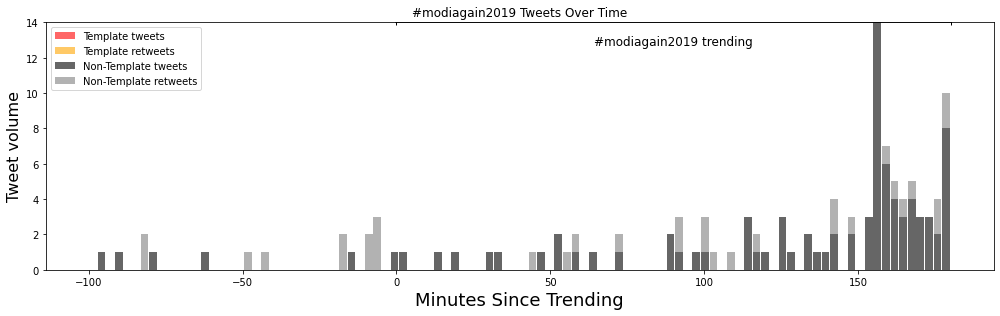

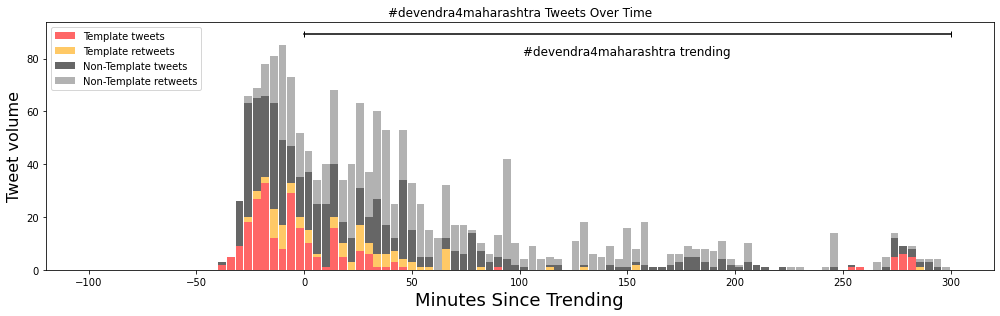

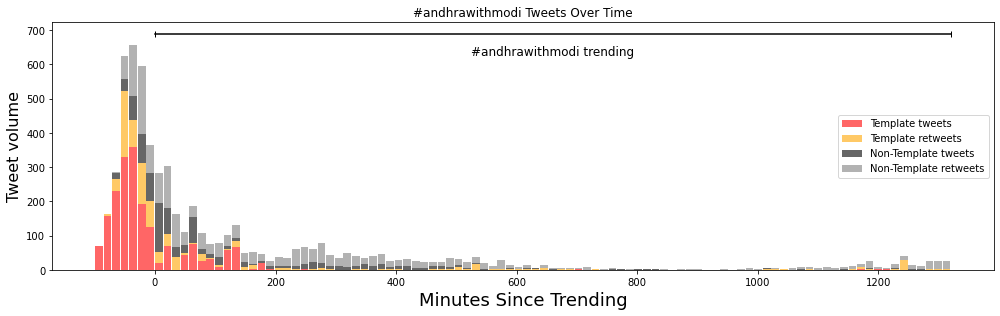

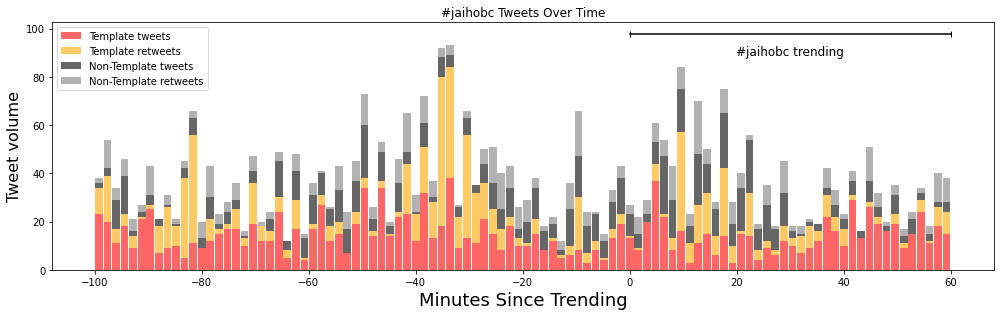

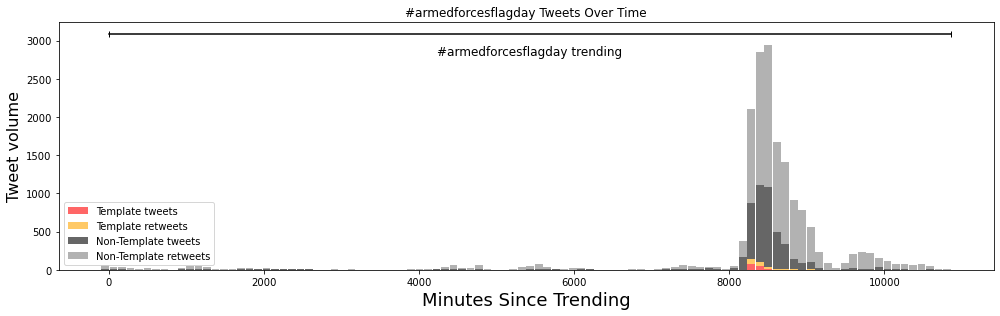

broken nris4modi


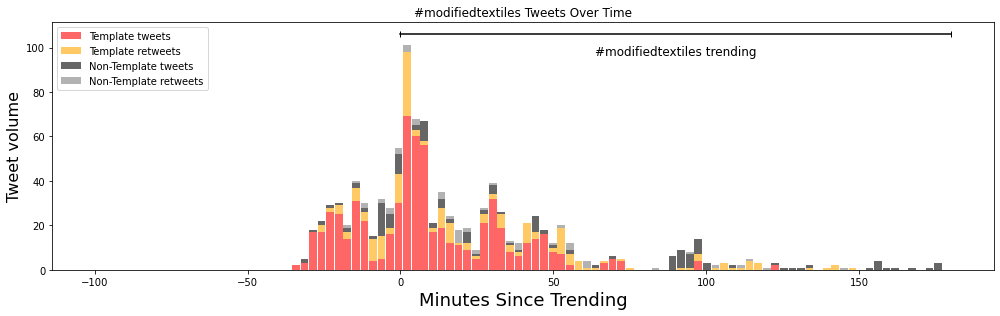

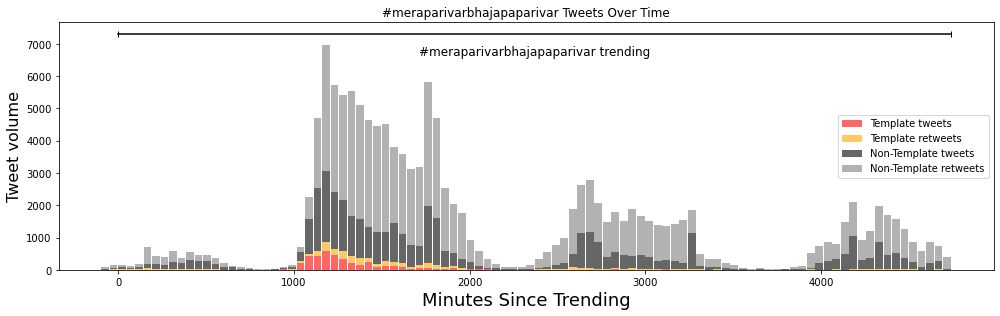

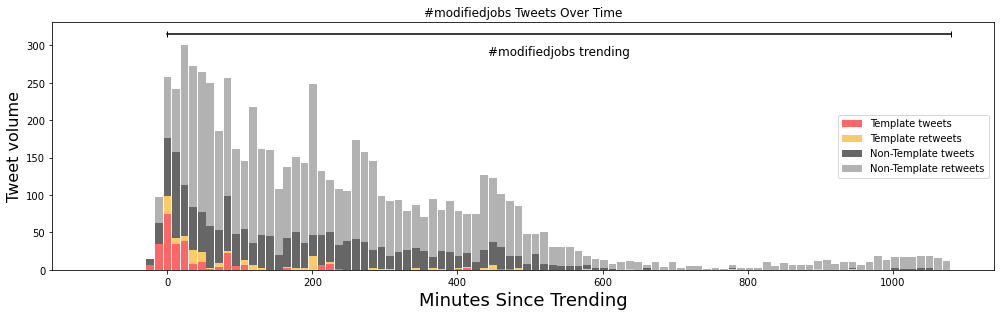

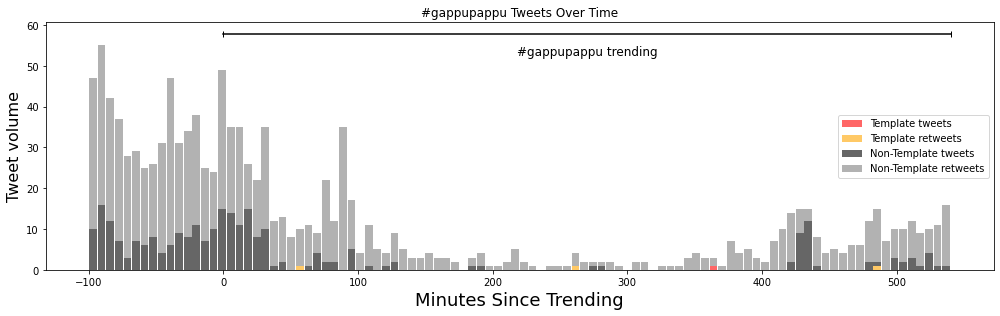

In [13]:
for ht, ts in campaigns.items():
    try:
        plot_event_study(ht, ts)
    except:
        print('broken', ht)

In [28]:
get_trend_behavior(hashtag)

,hashtag,place,level,day,time,volume,nan,datetime
11032,jharkhandwithmodi,Nagpur,Town,2019-02-17,10:00,NaN,NaN,2019-02-17 10:00:00
11082,jharkhandwithmodi,Lucknow,Town,2019-02-17,10:00,NaN,NaN,2019-02-17 10:00:00
11134,jharkhandwithmodi,Kanpur,Town,2019-02-17,10:00,NaN,NaN,2019-02-17 10:00:00
11186,jharkhandwithmodi,Patna,Town,2019-02-17,10:00,NaN,NaN,2019-02-17 10:00:00
11232,jharkhandwithmodi,Ranchi,Town,2019-02-17,10:00,NaN,NaN,2019-02-17 10:00:00
...,...,...,...,...,...,...,...,...
44948,jharkhandwithmodi,Bangalore,Town,2019-02-17,16:00,11804.0,NaN,2019-02-17 16:00:00
44997,jharkhandwithmodi,Chennai,Town,2019-02-17,16:00,11804.0,NaN,2019-02-17 16:00:00
45048,jharkhandwithmodi,Delhi,Town,2019-02-17,16:00,11829.0,NaN,2019-02-17 16:00:00
45097,jharkhandwithmodi,India,Country,2019-02-17,16:00,11804.0,NaN,2019-02-17 16:00:00
